# Forecasting Fertilizer Efficiency and Agricultural Productivity in East Africa

## Problem Statement
East Africa depends heavily on agriculture, but productivity remains low. Fertilizer usage is rising, yet efficiency and yield gains are unclear. There is need to optimize fertilizer use to sustainably boost agricultural output using historical data.

#  Business Understanding

## 1. Project Title
Forecasting Fertilizer Efficiency and Agricultural Productivity in East Africa  
*"Optimizing agricultural growth through smart data-driven fertilizer strategies"*



## 2. Overview
Agriculture forms the backbone of East Africa’s economy, employing over 60% of the region’s workforce and contributing significantly to GDP. However, the region continues to struggle with low agricultural productivity despite increased access to agricultural inputs like fertilizers. Governments and development partners have ramped up investment in fertilizer subsidies and distribution programs, yet the return on these efforts remains ambiguous. Are these inputs translating into higher yields and sustainable food production?



## 3. Business Problem
Fertilizer use is rising across East Africa, but crop yield improvements are inconsistent and vary widely between countries. Policymakers, NGOs, and agritech investors are concerned that fertilizer is being applied inefficiently, without data-driven guidance. Without clear insights into the fertilizer productivity relationship and future needs, policies may misallocate resources, and farmers may suffer from suboptimal yields.There is need to optimize fertilizer use to sustainably boost agricultural output using historical data.


## 4. Project Objective

### Main Objectives
- To develop a data-driven framework that forecasts fertilizer usage and supports sustainable agricultural productivity across East Africa, empowering stakeholders with insights that guide better policies, investments, and resource allocation.

### Specific Objectives
1. To analyze historical fertilizer consumption trends across East African countries from 1960 to 2023.


2. To investigate the relationship between fertilizer usage and agricultural productivity indicators.


3. To develop time-series models for forecasting future fertilizer demand up to 2035.


4. To build machine learning models that predict productivity outcomes based on fertilizer use and other variables.


5. To cluster countries with similar fertilizer efficiency patterns for targeted policy recommendations.


6. To generate insights and actionable strategies that support sustainable agriculture and food security beyond the scope of the project.



## 5. Stakeholders
- **National Ministries of Agriculture** – for strategic input planning and subsidies  
- **Regional Bodies** (EAC, IGAD) – for coordination and policy harmonization  
- **Farmers' Cooperatives** – to optimize fertilizer application practices  
- **Agritech Companies** – to align product offerings with market needs  
- **Donors & NGOs** (FAO, World Bank) – for evaluating the impact of their interventions  
- **Investors** – identifying high-potential regions for agricultural investment



## 6. Scope
- **Countries:** East African states recognized by the United Nations  
- **Timeframe:** 1960–2023  
- **Data Sources:** World Bank, FAO, and national statistics  
- **Indicators:** Fertilizer use (kg/hectare), productivity measures, rural population, arable land  
- **Out of Scope:** Non-crop agriculture (e.g., livestock productivity), fertilizer manufacturing economics


## 7. Business Value
This project delivers a data-driven foundation for improving food security, optimizing fertilizer subsidies, and guiding investment in sustainable agriculture. By understanding fertilizer efficiency across East Africa, stakeholders can make smarter, targeted decisions improving yields, reducing waste, and ultimately boosting economic and human development across the region.



## 8. Success Metrics

1. **Accuracy of Forecasting Models**:  
   - Achieve a minimum accuracy of X% (e.g., >85%) in time-series forecasting models for fertilizer demand by 2035.
   - Low Mean Absolute Percentage Error (MAPE) or Root Mean Square Error (RMSE) for predictions.

2. **Correlation Strength**:  
   - Strong positive correlation (R^2 value > Y, e.g., >0.7) between fertilizer usage and agricultural productivity indicators.

3. **Cluster Performance**:  
   - Clustering models should identify distinct groups of countries with > Z% homogeneity in fertilizer efficiency patterns.

4. **Actionable Insights**:  
   - Deliver at least 5 region-specific actionable policy recommendations supported by the analysis.
   - Produce a comprehensive report used by at least 3 stakeholders (e.g., Ministries, NGOs, donors).

5. **User Engagement**:  
   - Stakeholder satisfaction score >80% based on post-project surveys.
   - Adoption of the framework by at least 2 East African governments, donor agencies, or agritech companies.

6. **Impact on Sustainable Development**:  
   - Quantifiable increase in agricultural productivity or efficiency in pilot regions where recommendations are implemented (e.g., productivity increase by X metric tons/hectare).

7. **Visualization and Accessibility**:  
   - Interactive dashboards (Tableau or equivalent) with user-friendly designs evaluated positively by stakeholders.
   - 100% of key findings accessible to stakeholders via reports, presentations, or dashboards.



## 9. Tools & Technologies

This project utilizes the following tools and technologies:

- **Languages**: Python (Pandas, NumPy, Matplotlib, Seaborn)
- **Machine Learning & Forecasting**: Scikit-learn, XGBoost, Statsmodels (ARIMA), TensorFlow/Keras (LSTM)
- **Unsupervised Learning**: Scikit-learn (K-Means), PCA
- **Visualization**: Seaborn,  Tableau
- **Data Sources**: World Bank Open Data, FAO
- **Platform**: Jupyter Notebook, GitHub for version control and collaboration

## Importing the libraries

In [1]:
#!pip install neuralforecast

In [2]:
import pandas as pd
from pandas.plotting import parallel_coordinates
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.arima.model import ARIMA

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping

from neuralforecast import NeuralForecast
from neuralforecast.models import NBEATS

import joblib

import warnings
warnings.filterwarnings("ignore")

C:\Users\HP\anaconda3\envs\east_africa_env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2025-05-07 09:10:28,050	INFO util.py:154 -- Missing packages: ['ipywidgets']. Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2025-05-07 09:10:28,406	INFO util.py:154 -- Missing packages: ['ipywidgets']. Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


### Downloading the data (if using colab)  
Comment out this cell if using jupyter, or uncomment if using colab to download the dataset

In [3]:
# import gdown
# import zipfile

# url = 'https://drive.google.com/file/d/1s9Li3c4bJVNe1cy7BGYGU_Vs-Fvtg13g/view?usp=sharing'
# # Step 1: Create the data and clean directories
# os.makedirs('data', exist_ok=True)
# os.makedirs('clean', exist_ok=True)
# os.makedirs('models', exist_ok=True)

# # Step 2: Use gdown to download the zip file
# # Convert the Google Drive shareable link to a gdown-compatible format
# file_id = '1s9Li3c4bJVNe1cy7BGYGU_Vs-Fvtg13g'
# gdown.download(f'https://drive.google.com/uc?id={file_id}', 'data/data.zip', quiet=False)

# # Step 3: Extract the zip file into the data folder
# with zipfile.ZipFile('data/data.zip', 'r') as zip_ref:
#     zip_ref.extractall('data')

# # Remove the zip file after extraction
# os.remove('data/data.zip')


### Exploring the data
Starting with the Tanzania dataset

In [4]:
df = pd.read_csv('data/Tanzania.csv')
df.head()

,Country Name,Country ISO3,Year,Indicator Name,Indicator Code,Value
0,#country+name,#country+code,#date+year,#indicator+name,#indicator+code,#indicator+value+num
1,Tanzania,TZA,1991,Fertilizer consumption (% of fertilizer produc...,AG.CON.FERT.PT.ZS,868.817768450507
2,Tanzania,TZA,1990,Fertilizer consumption (% of fertilizer produc...,AG.CON.FERT.PT.ZS,954.128440366972
3,Tanzania,TZA,1989,Fertilizer consumption (% of fertilizer produc...,AG.CON.FERT.PT.ZS,615.277777777778
4,Tanzania,TZA,1988,Fertilizer consumption (% of fertilizer produc...,AG.CON.FERT.PT.ZS,2878.47658979734


Observation:  
There is some redundancy, i.e. we have two rows giving metadata (country name, code etc.) of the dataset. One has to be removed.

In [5]:
# Dropping one of the redundant rows
df.drop(0, inplace=True)
df.head()

,Country Name,Country ISO3,Year,Indicator Name,Indicator Code,Value
1,Tanzania,TZA,1991,Fertilizer consumption (% of fertilizer produc...,AG.CON.FERT.PT.ZS,868.817768450507
2,Tanzania,TZA,1990,Fertilizer consumption (% of fertilizer produc...,AG.CON.FERT.PT.ZS,954.128440366972
3,Tanzania,TZA,1989,Fertilizer consumption (% of fertilizer produc...,AG.CON.FERT.PT.ZS,615.277777777778
4,Tanzania,TZA,1988,Fertilizer consumption (% of fertilizer produc...,AG.CON.FERT.PT.ZS,2878.47658979734
5,Tanzania,TZA,1987,Fertilizer consumption (% of fertilizer produc...,AG.CON.FERT.PT.ZS,998.351419031719


In [6]:
df.tail()

,Country Name,Country ISO3,Year,Indicator Name,Indicator Code,Value
1597,Tanzania,TZA,1984,Economically active population in agriculture ...,EN.AGR.EMPL,8810000
1598,Tanzania,TZA,1983,Economically active population in agriculture ...,EN.AGR.EMPL,8545000
1599,Tanzania,TZA,1982,Economically active population in agriculture ...,EN.AGR.EMPL,8289000
1600,Tanzania,TZA,1981,Economically active population in agriculture ...,EN.AGR.EMPL,8042000
1601,Tanzania,TZA,1980,Economically active population in agriculture ...,EN.AGR.EMPL,7806000


Observation:  
The data is uniform, but the indicator names have different values at the top and bottom of the dataset, they have to be explored further.

In [7]:
df.shape

(1601, 6)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1601 entries, 1 to 1601
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Country Name    1601 non-null   object
 1   Country ISO3    1601 non-null   object
 2   Year            1601 non-null   object
 3   Indicator Name  1601 non-null   object
 4   Indicator Code  1601 non-null   object
 5   Value           1601 non-null   object
dtypes: object(6)
memory usage: 75.2+ KB


Observation:  
There are no null values, and all columns are of type 'object'.

## Combining all the datasets

In [9]:
# Path to folder with all country CSV files
folder_path = "data/"

# Initialize empty list to collect all cleaned data
all_dfs = []

for file in os.listdir(folder_path):
    if file.endswith(".csv"):
        file_path = os.path.join(folder_path, file)

        # Read the file, skipping the first row
        df = pd.read_csv(file_path, skiprows=1)

        all_dfs.append(df)

# Combine all into one large DataFrame
df_all = pd.concat(all_dfs, ignore_index=True)


In [10]:
df_all.head()

,#country+name,#country+code,#date+year,#indicator+name,#indicator+code,#indicator+value+num
0,Burundi,BDI,2022,Fertilizer consumption (kilograms per hectare ...,AG.CON.FERT.ZS,39.789866
1,Burundi,BDI,2021,Fertilizer consumption (kilograms per hectare ...,AG.CON.FERT.ZS,19.074362
2,Burundi,BDI,2020,Fertilizer consumption (kilograms per hectare ...,AG.CON.FERT.ZS,19.488689
3,Burundi,BDI,2019,Fertilizer consumption (kilograms per hectare ...,AG.CON.FERT.ZS,19.921414
4,Burundi,BDI,2018,Fertilizer consumption (kilograms per hectare ...,AG.CON.FERT.ZS,24.000934


In [11]:
df_all.tail()

,#country+name,#country+code,#date+year,#indicator+name,#indicator+code,#indicator+value+num
21183,Uganda,UGA,1984,Economically active population in agriculture ...,EN.AGR.EMPL,5515000.0
21184,Uganda,UGA,1983,Economically active population in agriculture ...,EN.AGR.EMPL,5360000.0
21185,Uganda,UGA,1982,Economically active population in agriculture ...,EN.AGR.EMPL,5217000.0
21186,Uganda,UGA,1981,Economically active population in agriculture ...,EN.AGR.EMPL,5079000.0
21187,Uganda,UGA,1980,Economically active population in agriculture ...,EN.AGR.EMPL,4946000.0


The data is uniform.

In [12]:
df_all.shape

(21188, 6)

In [13]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21188 entries, 0 to 21187
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   #country+name         21188 non-null  object 
 1   #country+code         21188 non-null  object 
 2   #date+year            21188 non-null  int64  
 3   #indicator+name       21188 non-null  object 
 4   #indicator+code       21188 non-null  object 
 5   #indicator+value+num  21188 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 993.3+ KB


In [14]:
df_all.rename(columns={
    "#country+name": "country_name",
    "#country+code": "country_code",
    "#date+year": "year",
    "#indicator+name": "indicator_name",
    "#indicator+code": "indicator_code",
    "#indicator+value+num": "value"
}, inplace=True)


Looking at the number of unique values next

In [15]:
for col in df_all.columns:
    unique_vals = df_all[col].unique()
    print(f"Column '{col}' has {len(unique_vals)} unique value(s):")
    print(f"Unique values: {list(unique_vals)}\n")

Column 'country_name' has 15 unique value(s):
Unique values: ['Burundi', 'Comoros', 'Djibouti', 'Eritrea', 'Ethiopia', 'Kenya', 'Madagascar', 'Mauritius', 'Rwanda', 'Seychelles', 'Somalia', 'South Sudan', 'Sudan', 'Tanzania', 'Uganda']

Column 'country_code' has 15 unique value(s):
Unique values: ['BDI', 'COM', 'DJI', 'ERI', 'ETH', 'KEN', 'MDG', 'MUS', 'RWA', 'SYC', 'SOM', 'SSD', 'SDN', 'TZA', 'UGA']

Column 'year' has 64 unique value(s):
Unique values: [np.int64(2022), np.int64(2021), np.int64(2020), np.int64(2019), np.int64(2018), np.int64(2017), np.int64(2016), np.int64(2015), np.int64(2014), np.int64(2013), np.int64(2012), np.int64(2011), np.int64(2010), np.int64(2009), np.int64(2008), np.int64(2007), np.int64(2006), np.int64(2005), np.int64(2004), np.int64(2003), np.int64(2002), np.int64(2001), np.int64(2000), np.int64(1999), np.int64(1998), np.int64(1997), np.int64(1996), np.int64(1995), np.int64(1994), np.int64(1993), np.int64(1992), np.int64(1991), np.int64(1990), np.int64(1989

A lot of different features seem to be located in the `indicator_name` column. We need to extract the features there and have them as our columns. However, since they are quite many (37), we'll just extract a few of them which will be useful or relevant for our objectives.

In [16]:
relevant_indicators = [
    "Fertilizer consumption (kilograms per hectare of arable land)",
    "Cereal yield (kg per hectare)",
    "Crop production index (2014-2016 = 100)",
    "Average precipitation in depth (mm per year)",
    "Arable land (hectares per person)",
    "Cereal production (metric tons)",
    "Agriculture, forestry, and fishing, value added (current US$)",
    "Employment in agriculture (% of total employment) (modeled ILO estimate)",
]

df_filtered = df_all[df_all["indicator_name"].isin(relevant_indicators)]
df_filtered.head()

,country_name,country_code,year,indicator_name,indicator_code,value
0,Burundi,BDI,2022,Fertilizer consumption (kilograms per hectare ...,AG.CON.FERT.ZS,39.789866
1,Burundi,BDI,2021,Fertilizer consumption (kilograms per hectare ...,AG.CON.FERT.ZS,19.074362
2,Burundi,BDI,2020,Fertilizer consumption (kilograms per hectare ...,AG.CON.FERT.ZS,19.488689
3,Burundi,BDI,2019,Fertilizer consumption (kilograms per hectare ...,AG.CON.FERT.ZS,19.921414
4,Burundi,BDI,2018,Fertilizer consumption (kilograms per hectare ...,AG.CON.FERT.ZS,24.000934


In [17]:
df_filtered.tail()

,country_name,country_code,year,indicator_name,indicator_code,value
20897,Uganda,UGA,1995,Employment in agriculture (% of total employme...,SL.AGR.EMPL.ZS,82.638169
20898,Uganda,UGA,1994,Employment in agriculture (% of total employme...,SL.AGR.EMPL.ZS,83.050163
20899,Uganda,UGA,1993,Employment in agriculture (% of total employme...,SL.AGR.EMPL.ZS,83.217775
20900,Uganda,UGA,1992,Employment in agriculture (% of total employme...,SL.AGR.EMPL.ZS,83.437099
20901,Uganda,UGA,1991,Employment in agriculture (% of total employme...,SL.AGR.EMPL.ZS,83.492156


## Making the relevant indicators part of the columns

In [18]:
df_pivot = df_filtered.pivot_table(
    index=["country_name", "country_code", "year"],
    columns="indicator_name",
    values="value"
).reset_index()

df_pivot

indicator_name,country_name,country_code,year,"Agriculture, forestry, and fishing, value added (current US$)",Arable land (hectares per person),Average precipitation in depth (mm per year),Cereal production (metric tons),Cereal yield (kg per hectare),Crop production index (2014-2016 = 100),Employment in agriculture (% of total employment) (modeled ILO estimate),Fertilizer consumption (kilograms per hectare of arable land)
0,Burundi,BDI,1961,NaN,0.238085,1274.0,130000.00,946.2,49.34,NaN,NaN
1,Burundi,BDI,1962,NaN,0.240720,1274.0,129150.00,1010.6,49.17,NaN,NaN
2,Burundi,BDI,1963,NaN,0.243784,1274.0,130080.00,919.6,48.98,NaN,NaN
3,Burundi,BDI,1964,NaN,0.243483,1274.0,148680.00,991.9,54.31,NaN,NaN
4,Burundi,BDI,1965,NaN,0.240660,1274.0,148278.00,983.6,53.79,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
884,Uganda,UGA,2019,8.110814e+09,0.160466,1180.0,3119000.00,2841.5,122.78,61.360432,3.366272
885,Uganda,UGA,2020,8.997405e+09,0.155206,1180.0,5190000.00,3025.6,153.38,64.071754,2.442355
886,Uganda,UGA,2021,9.663033e+09,0.150291,1180.0,7336556.00,4345.3,169.72,66.666067,2.442355
887,Uganda,UGA,2022,1.094102e+10,NaN,NaN,3876857.93,2289.5,148.35,66.329932,2.614987


Looking at the state of the missing values

In [19]:
df_pivot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 11 columns):
 #   Column                                                                    Non-Null Count  Dtype  
---  ------                                                                    --------------  -----  
 0   country_name                                                              889 non-null    object 
 1   country_code                                                              889 non-null    object 
 2   year                                                                      889 non-null    int64  
 3   Agriculture, forestry, and fishing, value added (current US$)             633 non-null    float64
 4   Arable land (hectares per person)                                         832 non-null    float64
 5   Average precipitation in depth (mm per year)                              749 non-null    float64
 6   Cereal production (metric tons)                                   

Since the column `Employment in agriculture (% of total employment) (modeled ILO estimate)` has a lot of missing values (only 461 non-null), we will drop this column, then impute the other columns.

### Impute missing values using KNN imputation

In [20]:
df_imputed = df_pivot.copy()
numeric_cols = df_imputed.select_dtypes(include='number').columns.drop("year")

for country in df_imputed['country_name'].unique():
    country_mask = df_imputed['country_name'] == country
    df_country = df_imputed.loc[country_mask].copy()

    # Skip if too few rows to impute
    if df_country.shape[0] < 2:
        continue

    # Extract numeric columns (ensure they exist)
    country_numeric = df_country[numeric_cols]

    # Drop columns that are entirely NaN (we can't impute those)
    cols_with_data = country_numeric.columns[country_numeric.notna().any()]
    if len(cols_with_data) < 2:
        continue  # skip if not enough features with data

    # Scale
    scaler = StandardScaler()
    scaled = scaler.fit_transform(country_numeric[cols_with_data])

    # Impute
    imputer = KNNImputer(n_neighbors=2)
    imputed_scaled = imputer.fit_transform(scaled)

    # Inverse scale
    imputed = scaler.inverse_transform(imputed_scaled)

    # Place back the imputed values
    df_imputed.loc[country_mask, cols_with_data] = imputed

df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 11 columns):
 #   Column                                                                    Non-Null Count  Dtype  
---  ------                                                                    --------------  -----  
 0   country_name                                                              889 non-null    object 
 1   country_code                                                              889 non-null    object 
 2   year                                                                      889 non-null    int64  
 3   Agriculture, forestry, and fishing, value added (current US$)             889 non-null    float64
 4   Arable land (hectares per person)                                         889 non-null    float64
 5   Average precipitation in depth (mm per year)                              889 non-null    float64
 6   Cereal production (metric tons)                                   

Most of the values have been imputed, only two columns still have a few missing values. We can impute those remaining missing values with the median, to avoid skewing our data.

In [21]:
# Fill remaining missing values with column medians
df_imputed.fillna(df_imputed.median(numeric_only=True), inplace=True)

In [22]:
df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 11 columns):
 #   Column                                                                    Non-Null Count  Dtype  
---  ------                                                                    --------------  -----  
 0   country_name                                                              889 non-null    object 
 1   country_code                                                              889 non-null    object 
 2   year                                                                      889 non-null    int64  
 3   Agriculture, forestry, and fishing, value added (current US$)             889 non-null    float64
 4   Arable land (hectares per person)                                         889 non-null    float64
 5   Average precipitation in depth (mm per year)                              889 non-null    float64
 6   Cereal production (metric tons)                                   

Now we do not have any missing values.  
The type of the `year` column is int though. We need to change it to Datetime type.

In [23]:
# Convert the 'year' column to datetime
df_imputed['year'] = pd.to_datetime(df_imputed['year'], format='%Y')

In [24]:
df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 11 columns):
 #   Column                                                                    Non-Null Count  Dtype         
---  ------                                                                    --------------  -----         
 0   country_name                                                              889 non-null    object        
 1   country_code                                                              889 non-null    object        
 2   year                                                                      889 non-null    datetime64[ns]
 3   Agriculture, forestry, and fishing, value added (current US$)             889 non-null    float64       
 4   Arable land (hectares per person)                                         889 non-null    float64       
 5   Average precipitation in depth (mm per year)                              889 non-null    float64       
 6   Cereal pro

We can now save it as a clean csv file now.

In [25]:
df_imputed.to_csv('clean/df_clean.csv', index=False)

## Exploratory Data Analysis

Loading the clean csv file.

In [26]:
df = pd.read_csv('clean/df_clean.csv')

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 11 columns):
 #   Column                                                                    Non-Null Count  Dtype  
---  ------                                                                    --------------  -----  
 0   country_name                                                              889 non-null    object 
 1   country_code                                                              889 non-null    object 
 2   year                                                                      889 non-null    object 
 3   Agriculture, forestry, and fishing, value added (current US$)             889 non-null    float64
 4   Arable land (hectares per person)                                         889 non-null    float64
 5   Average precipitation in depth (mm per year)                              889 non-null    float64
 6   Cereal production (metric tons)                                   

We need to first convert the year to datetime format and extract the year as an integer.

In [28]:
df['year'] = pd.to_datetime(df['year']).dt.year
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 11 columns):
 #   Column                                                                    Non-Null Count  Dtype  
---  ------                                                                    --------------  -----  
 0   country_name                                                              889 non-null    object 
 1   country_code                                                              889 non-null    object 
 2   year                                                                      889 non-null    int32  
 3   Agriculture, forestry, and fishing, value added (current US$)             889 non-null    float64
 4   Arable land (hectares per person)                                         889 non-null    float64
 5   Average precipitation in depth (mm per year)                              889 non-null    float64
 6   Cereal production (metric tons)                                   

### 1. Univariate analysis

### Fertilizer consumption (kg/hectare)

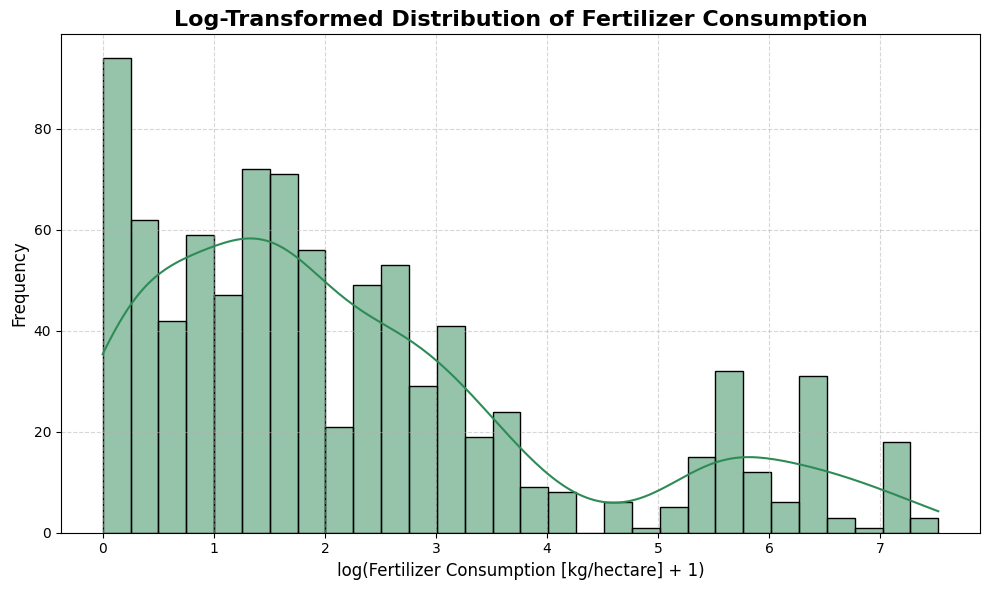

In [29]:
# Add a small constant to avoid log(0)
data = df['Fertilizer consumption (kilograms per hectare of arable land)'] + 1

plt.figure(figsize=(10, 6))
sns.histplot(np.log(data), kde=True, bins=30, color='seagreen')
plt.title('Log-Transformed Distribution of Fertilizer Consumption', fontsize=16, weight='bold')
plt.xlabel('log(Fertilizer Consumption [kg/hectare] + 1)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


The data shows that fertilizer consumption across countries is highly uneven. Most countries use relatively small amounts of fertilizer per hectare, while a smaller group uses much higher amounts. After applying a log transformation to adjust for this imbalance, we observed distinct usage patterns, suggesting that countries may fall into different categories of fertilizer use—ranging from low-input to high-input agriculture. This highlights the need for tailored agricultural policies and interventions rather than a one-size-fits-all approach

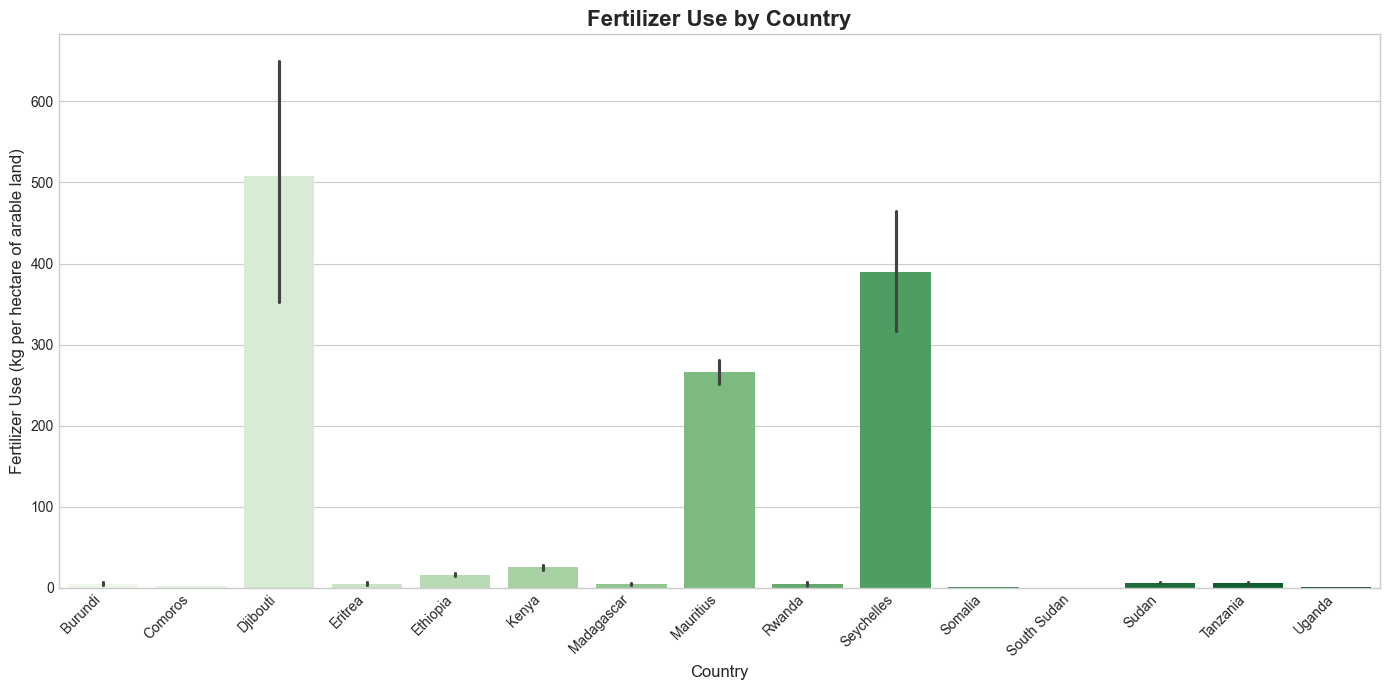

In [30]:
# Fertilizer Use by Country (Bar Graph)
plt.style.use('seaborn-v0_8-whitegrid')

plt.figure(figsize=(14, 7))
sns.barplot(
    data=df_imputed,
    x="country_name",
    y="Fertilizer consumption (kilograms per hectare of arable land)",
    palette="Greens"
)

plt.xticks(rotation=45, ha='right')
plt.title("Fertilizer Use by Country", fontsize=16, weight='bold')
plt.xlabel("Country", fontsize=12)
plt.ylabel("Fertilizer Use (kg per hectare of arable land)", fontsize=12)
plt.tight_layout()
plt.show()


We can see Djibouti and Seychelles are the top, in terms of fertilizer consumption in kgs per hectare.  
Mauritius follows at third, but the rest have relatively low levels of fertilizer consumption.

### Arable land per person

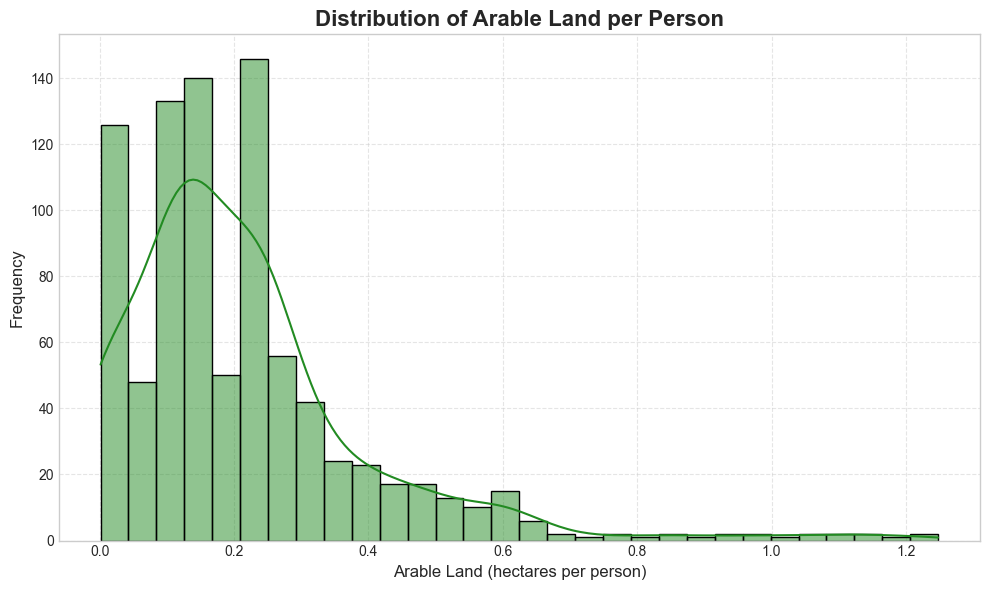

In [31]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Arable land (hectares per person)'], kde=True, bins=30, color='forestgreen')
plt.title('Distribution of Arable Land per Person', fontsize=16, weight='bold')
plt.xlabel('Arable Land (hectares per person)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


The majority of countries have very limited arable land available per person, with most falling below 0.3 hectares per individual.  
This indicates high population pressure on arable land in many regions, especially in more densely populated countries.  
Only a few countries have significantly more land per person, suggesting large disparities in land availability that could impact food security, land use planning, and agricultural scalability across regions.

### Cereal yield (kg/hectare)

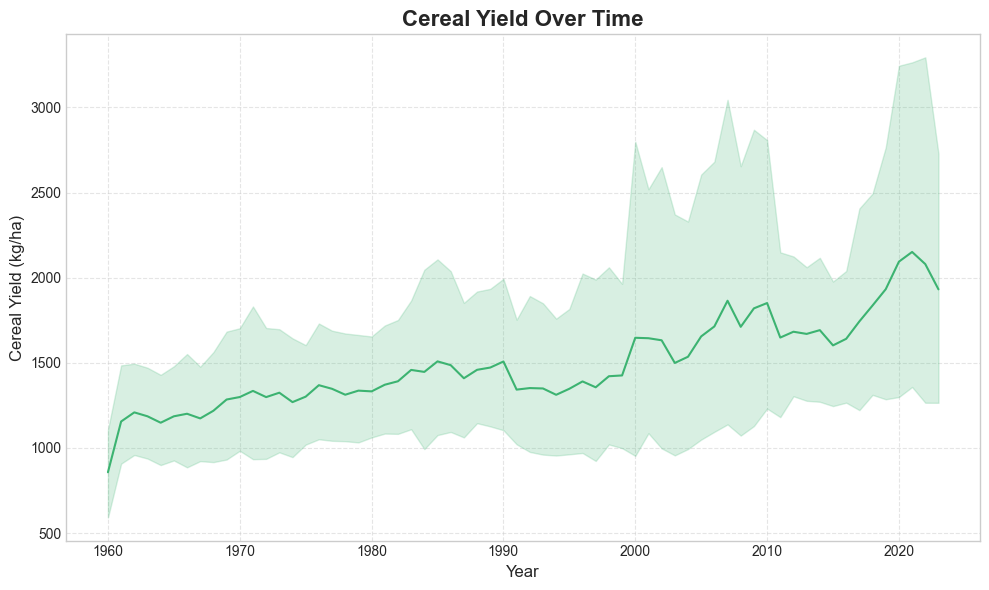

In [32]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='year', y='Cereal yield (kg per hectare)', color='mediumseagreen')
plt.title('Cereal Yield Over Time', fontsize=16, weight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Cereal Yield (kg/ha)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


Cereal yields have shown a clear upward trend globally since the 1960s, more than doubling in many cases. This reflects significant progress in agricultural practices, technology, and input use (like fertilizers and improved seeds).  
However, the wide variation around the trend—especially in recent years—suggests that not all countries are benefiting equally from these advancements.  
External factors such as climate variability, policy changes, and regional conflicts may be driving these fluctuations and need to be carefully managed to sustain growth.

### Employment in agriculture (% of total employment)

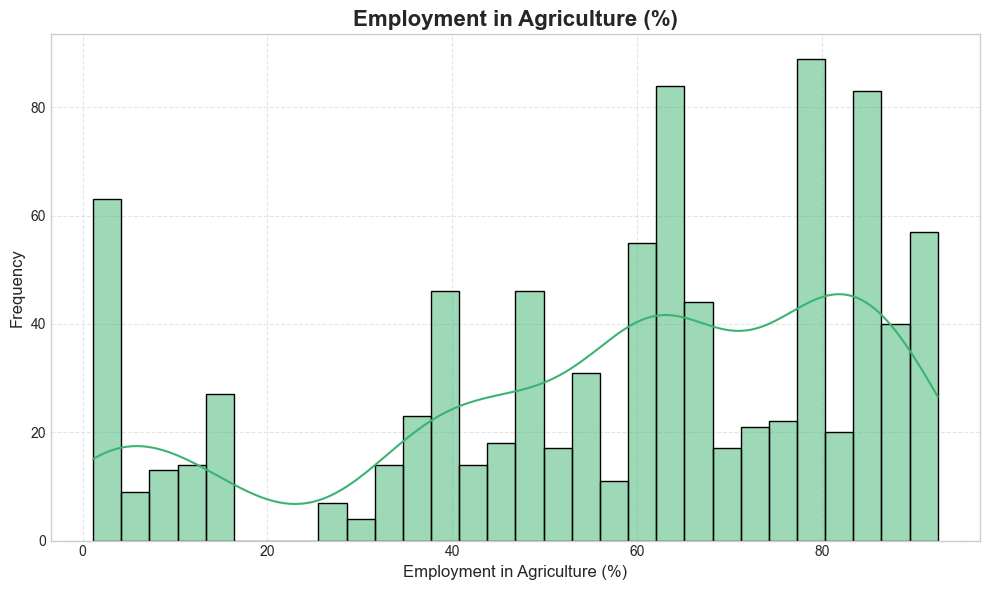

In [33]:
plt.figure(figsize=(10, 6))
sns.histplot(
    data=df,
    x='Employment in agriculture (% of total employment) (modeled ILO estimate)',
    kde=True,
    color='mediumseagreen',
    bins=30
)
plt.title('Employment in Agriculture (%)', fontsize=16, weight='bold')
plt.xlabel('Employment in Agriculture (%)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


### 2. Bivariate Analysis

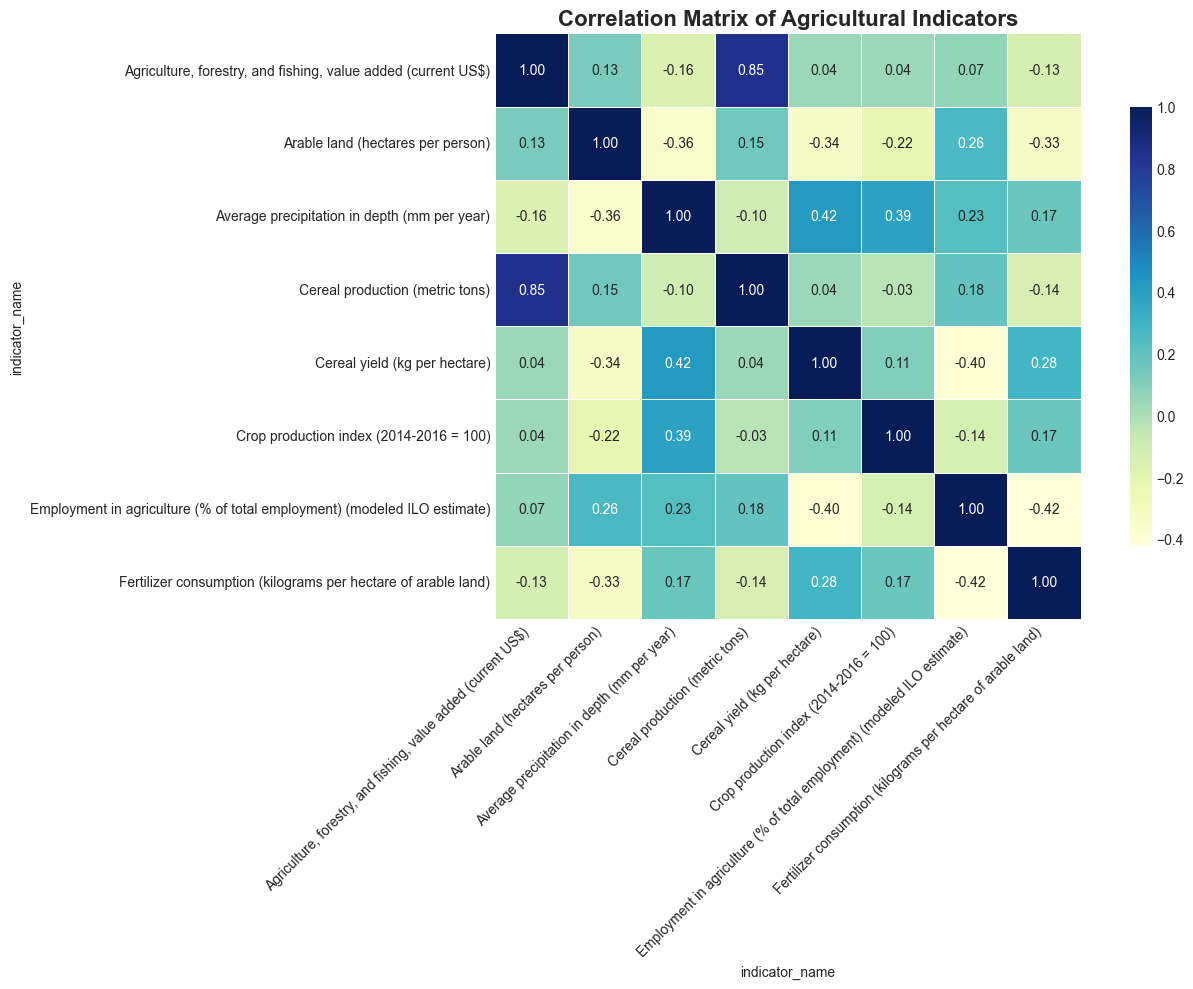

In [34]:
# Correlation Matrix of Agricultural Indicators
# Set consistent plot style
plt.style.use('seaborn-v0_8-whitegrid')

# Correlation heatmap for numerical features
plt.figure(figsize=(14, 10))
correlation_matrix = df_imputed.select_dtypes(include='number').corr()

sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap="YlGnBu",
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.75},
)

plt.title("Correlation Matrix of Agricultural Indicators", fontsize=16, weight='bold')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

- Agricultural land and arable land are strongly correlated (0.85), meaning countries with more agricultural land per capita also tend to have more arable land per capita.

- Precipitation is positively correlated with cereal production (0.42) and renewable water (0.39), suggesting water availability supports agricultural output.

- Fertilizer consumption has weak or negative correlations with most variables, including cereal yield (-0.10), implying fertilizer use alone doesn't drive yield.

- Rural population and total population are negatively correlated with renewable water (-0.40), suggesting higher populations may strain water resources.

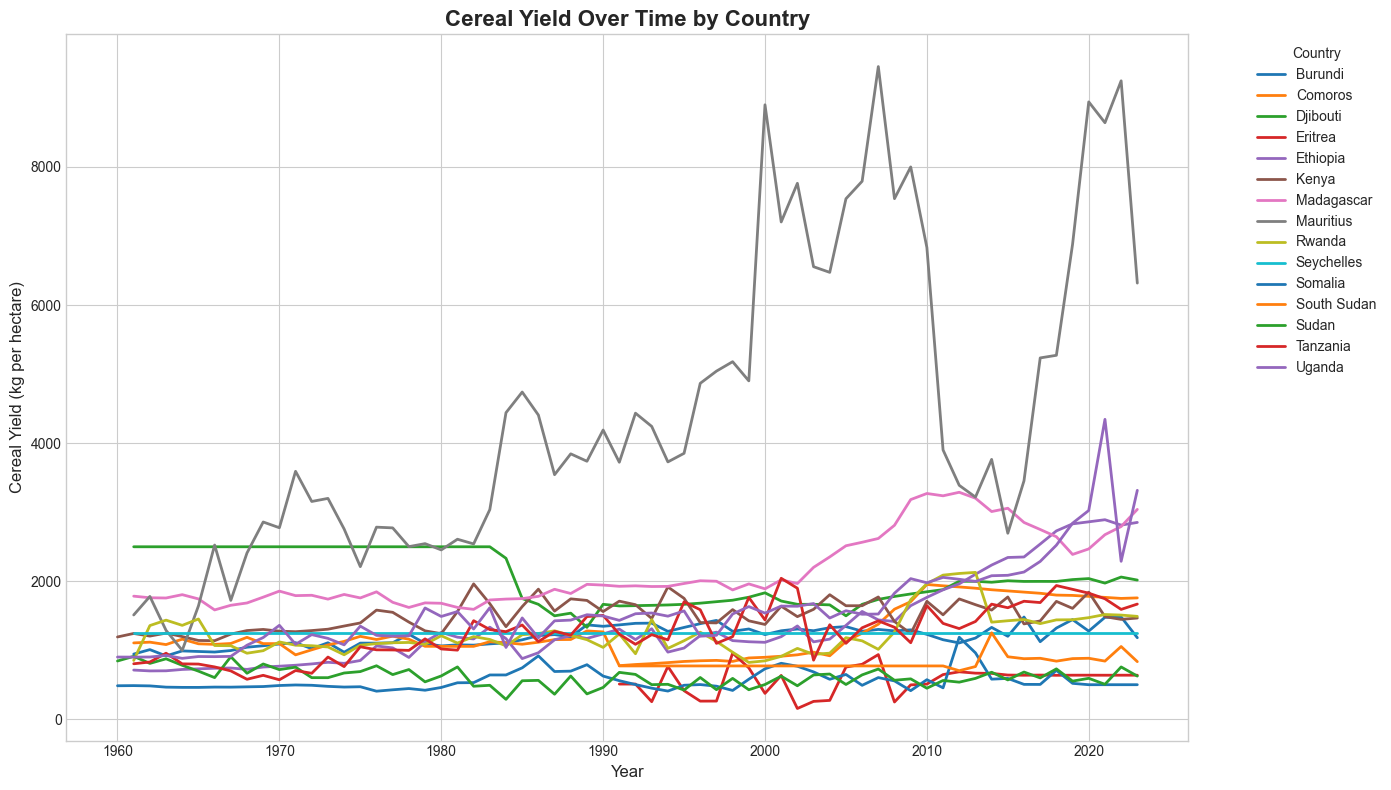

In [35]:
# Cereal Yield Over Time by Country
# Set plot style
plt.style.use('seaborn-v0_8-whitegrid')

plt.figure(figsize=(14, 8))
sns.lineplot(
    data=df_imputed,
    x="year",
    y="Cereal yield (kg per hectare)",
    hue="country_name",
    palette="tab10",
    linewidth=2
)

plt.title("Cereal Yield Over Time by Country", fontsize=16, weight='bold')
plt.xlabel("Year", fontsize=12)
plt.ylabel("Cereal Yield (kg per hectare)", fontsize=12)
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

- There's a large disparity in productivity among countries.

- Yield improvement seems gradual for most, but a few (like Mauritius and Ethiopia) show more dramatic improvements.



**Mauritius** has achieved remarkable cereal yield improvements over the past several decades, significantly outperforming both regional and global averages. In 2022, the country's cereal yield reached 9,247 kg per hectare, more than double the global average of approximately 3,866 kg per hectare .


Several factors contribute to this impressive performance:


 - **Advanced Technology**

Adoption of high-yield and drought-resistant cereal varieties

Use of modern machinery and precision agriculture tools

 - **Efficient Irrigation**

Widespread use of drip irrigation reduces water waste and stabilizes yields despite rainfall variability

 - **Strong Government Support**

Subsidies for equipment and fertilizers

Investment in R&D and farmer training programs

 - **Sustainable Farming**

Practices like crop rotation and organic methods improve soil and crop resilience

 - **Data-Driven Agriculture**

Use of remote sensing and data analytics for weather tracking, soil health, and smarter farming decisions

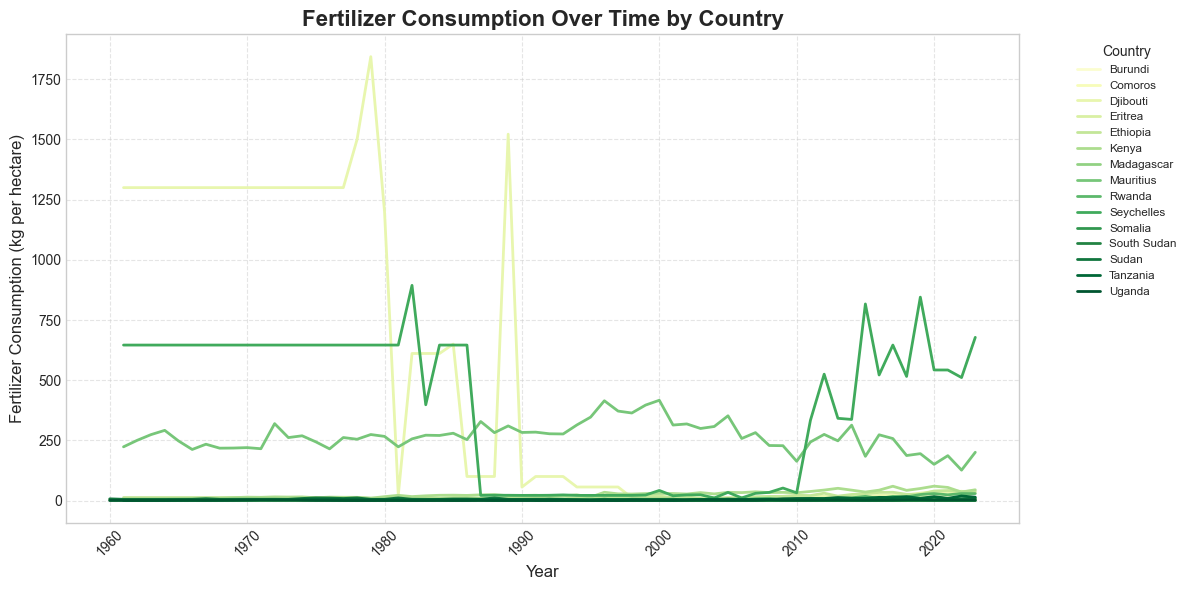

In [36]:
# Fertilizer Consumption Over Time by Country
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=df,
    x='year',
    y='Fertilizer consumption (kilograms per hectare of arable land)',
    hue='country_name',
    palette='YlGn',
    linewidth=2
)

plt.title('Fertilizer Consumption Over Time by Country', fontsize=16, weight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Fertilizer Consumption (kg per hectare)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
plt.tight_layout()
plt.show()

- Seychelles and Mauritius have long-standing efficient agricultural systems.

- Kenya and Rwanda are emerging agricultural economies improving their fertilizer usage recently.

- Djibouti's sharp spikes and collapses show how unsustained interventions fail to lead to lasting change.

- Most East African nations still struggle with low fertilizer adoption, which directly connects to lower cereal yields and food insecurity risks.

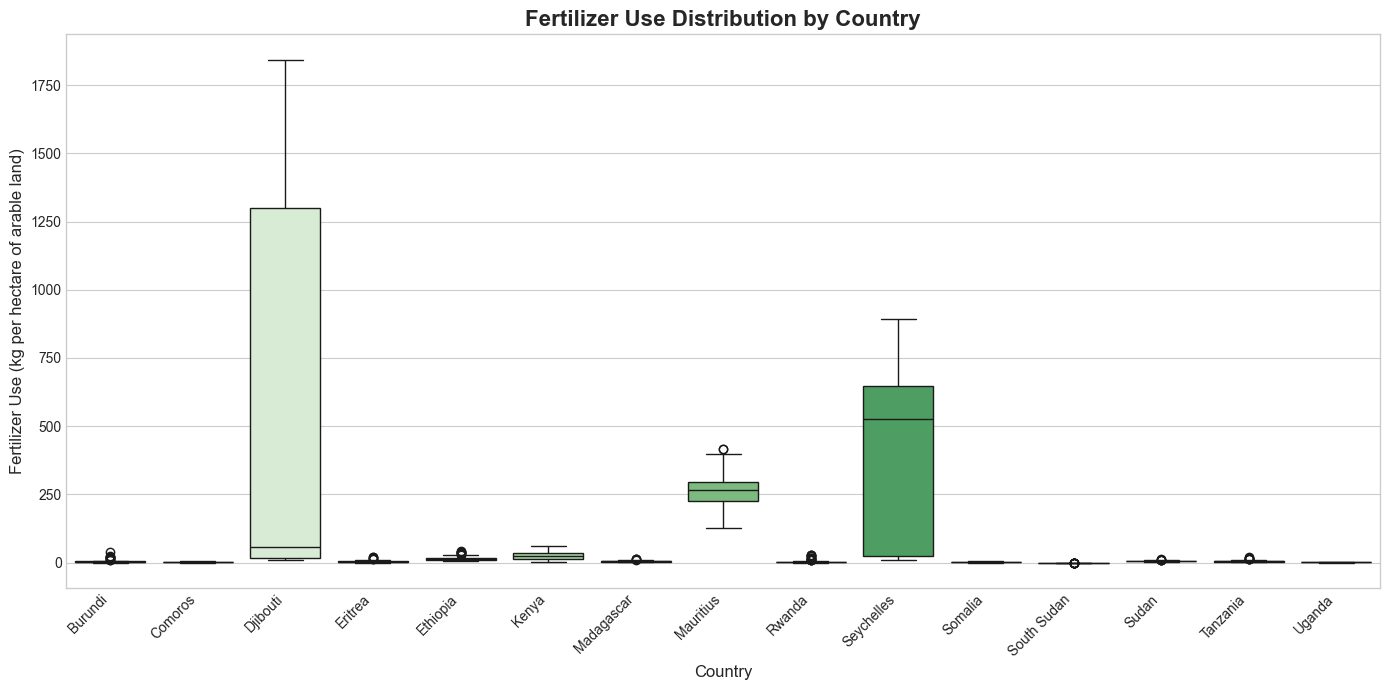

In [37]:
# Fertilizer Use Distribution by Country
# Set plot style
plt.style.use('seaborn-v0_8-whitegrid')

plt.figure(figsize=(14, 7))
sns.boxplot(
    data=df_imputed,
    x="country_name",
    y="Fertilizer consumption (kilograms per hectare of arable land)",
    palette="Greens"
)

plt.xticks(rotation=45, ha='right')
plt.title("Fertilizer Use Distribution by Country", fontsize=16, weight='bold')
plt.xlabel("Country", fontsize=12)
plt.ylabel("Fertilizer Use (kg per hectare of arable land)", fontsize=12)
plt.tight_layout()
plt.show()

- Djibouti and Seychelles have the highest fertilizer use, with Djibouti showing extreme variability—a wide interquartile range and many potential outliers, indicating inconsistent usage across years or regions.

- Mauritius and Rwanda also have relatively high and consistent usage, suggesting well-developed agricultural practices.

- The majority of countries, including Burundi, Comoros, Eritrea, Ethiopia, Kenya, Madagascar, Somalia, South Sudan, Sudan, Tanzania, and Uganda, show very low fertilizer use with minimal variation, indicating low input agriculture.

- This disparity highlights significant regional differences in agricultural input levels, possibly reflecting economic factors, infrastructure, or policy support.

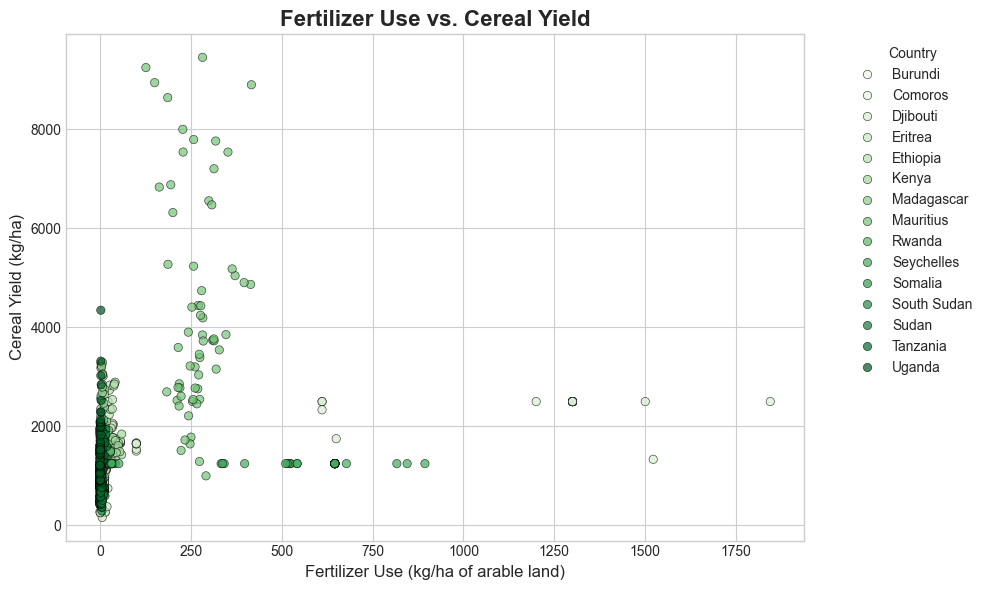

In [38]:
# Scatter Plot (Fertilizer Use vs Cereal Yield)
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_imputed,
    x="Fertilizer consumption (kilograms per hectare of arable land)",
    y="Cereal yield (kg per hectare)",
    hue="country_name",
    palette="Greens",
    alpha=0.7,
    edgecolor="black"
)

plt.title("Fertilizer Use vs. Cereal Yield", fontsize=16, weight='bold')
plt.xlabel("Fertilizer Use (kg/ha of arable land)", fontsize=12)
plt.ylabel("Cereal Yield (kg/ha)", fontsize=12)
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

There is no strong linear relationship between fertilizer use and cereal yield across countries.

- Most countries cluster at low fertilizer usage, but their yields vary widely.

- A few countries use high amounts of fertilizer, yet do not always achieve higher yields.

- This may indicate that fertilizer efficiency varies due to other factors like:

 - Soil quality

 - Irrigation systems

 - Crop type

 - Agricultural practices

- It suggests that fertilizer use alone is not a guaranteed predictor of high cereal yield

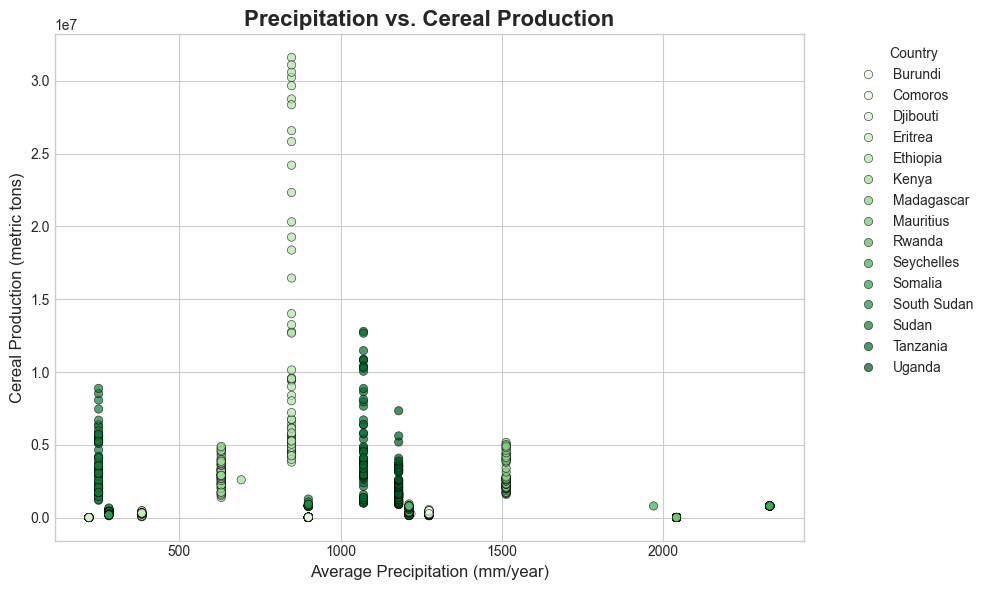

In [39]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_imputed,
    x="Average precipitation in depth (mm per year)",
    y="Cereal production (metric tons)",
    hue="country_name",
    palette="Greens",
    alpha=0.7,
    edgecolor="black"
)

plt.title("Precipitation vs. Cereal Production", fontsize=16, weight='bold')
plt.xlabel("Average Precipitation (mm/year)", fontsize=12)
plt.ylabel("Cereal Production (metric tons)", fontsize=12)
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

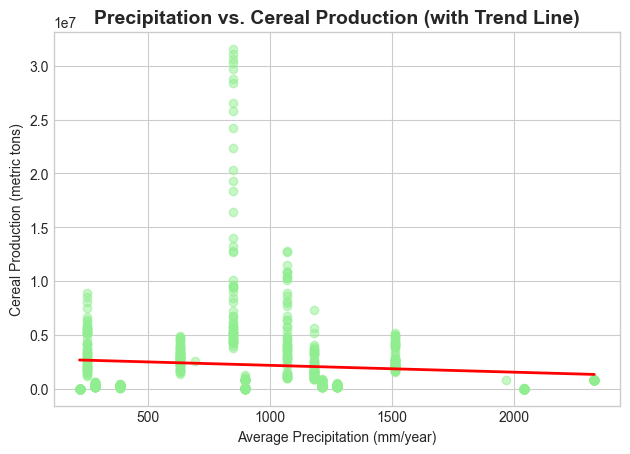

In [40]:
# Trendline
sns.regplot(
    data=df_imputed,
    x="Average precipitation in depth (mm per year)",
    y="Cereal production (metric tons)",
    scatter_kws={"alpha": 0.5, "color": "lightgreen"},
    line_kws={"color": "red", "linewidth": 2},
    ci=None
)
plt.title("Precipitation vs. Cereal Production (with Trend Line)", fontsize=14, weight='bold')
plt.xlabel("Average Precipitation (mm/year)")
plt.ylabel("Cereal Production (metric tons)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [41]:
# Correlation coefficient
correlation = df_imputed["Average precipitation in depth (mm per year)"].corr(
    df_imputed["Cereal production (metric tons)"]
)
print(f"Pearson correlation coefficient: {correlation:.3f}")

Pearson correlation coefficient: -0.100


- The red line shows a slight negative slope, indicating a weak negative relationship between precipitation and cereal production.
- This Pearson correlation coefficient is close to 0, meaning there's very little linear relationship between the two variables.
- Cereal production might not be strongly influenced by precipitation alone.

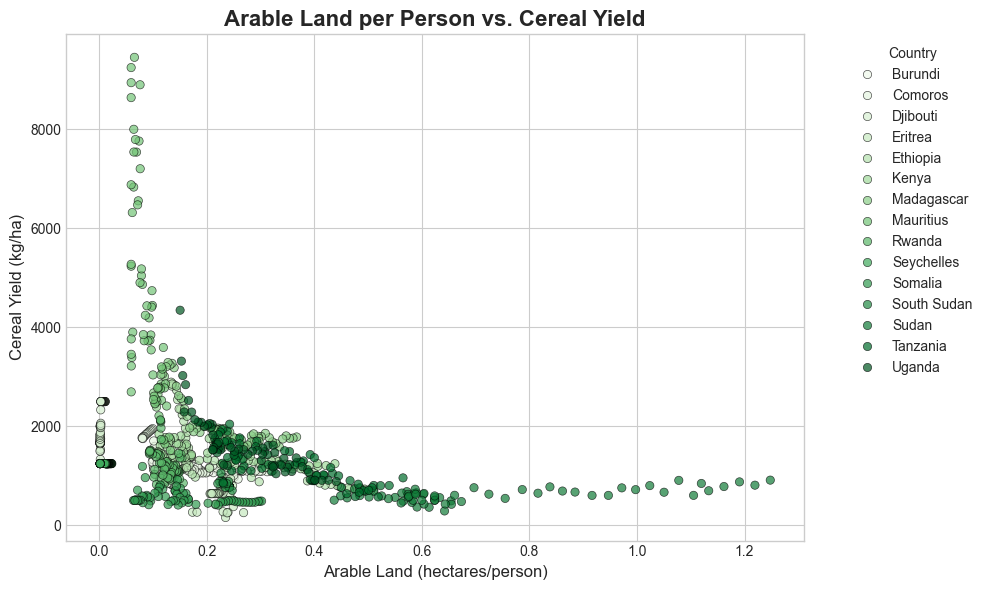

In [42]:
# Arable Land vs. Cereal Yield
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_imputed,
    x="Arable land (hectares per person)",
    y="Cereal yield (kg per hectare)",
    hue="country_name",
    palette="Greens",
    alpha=0.7,
    edgecolor="black"
)

plt.title("Arable Land per Person vs. Cereal Yield", fontsize=16, weight='bold')
plt.xlabel("Arable Land (hectares/person)", fontsize=12)
plt.ylabel("Cereal Yield (kg/ha)", fontsize=12)
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

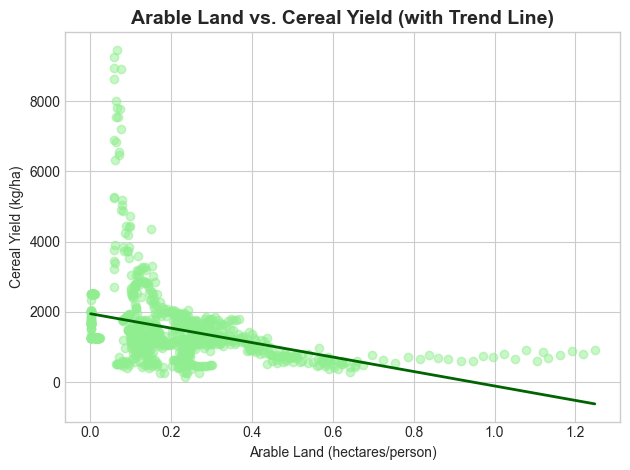

In [43]:
# Trendline
sns.regplot(
    data=df_imputed,
    x="Arable land (hectares per person)",
    y="Cereal yield (kg per hectare)",
    scatter_kws={"alpha": 0.5, "color": "lightgreen"},
    line_kws={"color": "darkgreen", "linewidth": 2},
    ci=None
)

plt.title("Arable Land vs. Cereal Yield (with Trend Line)", fontsize=14, weight='bold')
plt.xlabel("Arable Land (hectares/person)")
plt.ylabel("Cereal Yield (kg/ha)")
plt.grid(True)
plt.tight_layout()
plt.show()


- **Negative Correlation:** The trend line slopes downward, suggesting a negative relationship—countries with more arable land per person tend to have lower cereal yields per hectare.

- **High Yield with Less Land:** Most high-yield values are concentrated on the left side (low arable land per person), indicating that countries with limited land per person often achieve higher productivity, possibly due to intensive farming practices or better inputs (e.g., irrigation, fertilizers, technology).

- **Low Yield with More Land:** On the right side, where arable land per person is higher, cereal yields tend to be lower. This may reflect extensive but less productive agriculture.

- **Outliers:** There are a few countries or observations with exceptionally high yields, especially where arable land per person is very low, which might be due to advanced agricultural systems or specific crops.

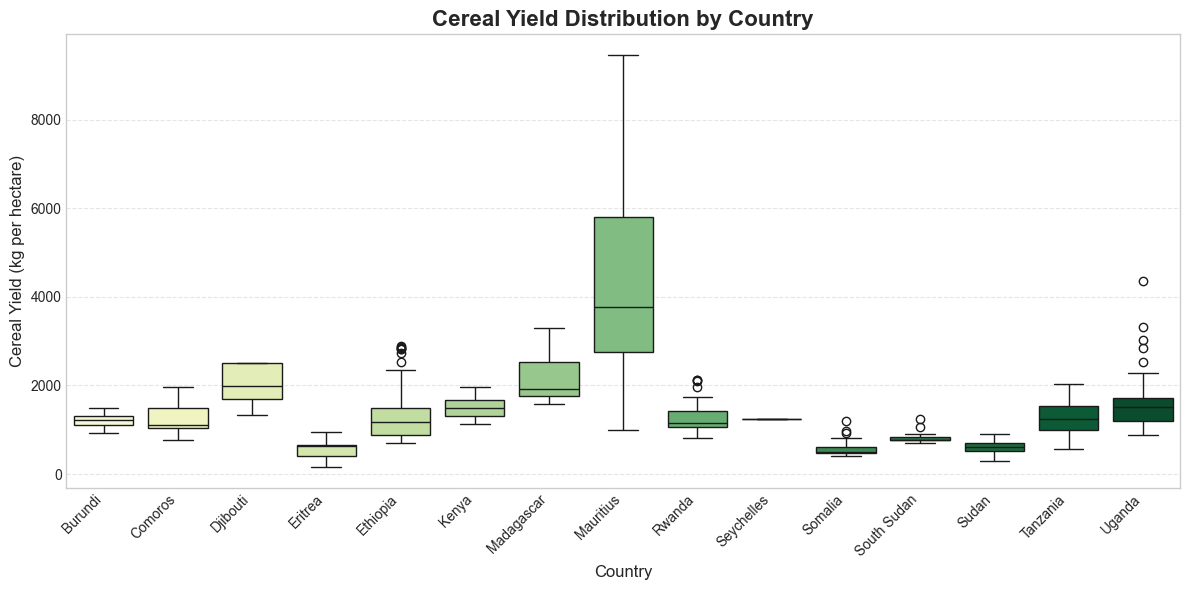

In [44]:
# Cereal Yield Distribution by Continent
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=df_imputed,
    x='country_name',
    y='Cereal yield (kg per hectare)',
    palette='YlGn'
)

plt.title('Cereal Yield Distribution by Country', fontsize=16, weight='bold')
plt.xlabel('Country', fontsize=12)
plt.ylabel('Cereal Yield (kg per hectare)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

- Cereal yield is not evenly distributed globally—some countries are high performers, while others struggle with consistently low output.


1. **Top Performer: Mauritius**
 - Highest cereal yield, with a wide range and several high-yield outliers.

 - Reflects efficient agricultural practices, possibly supported by strong infrastructure and input use.


2. **Moderate Performers:**
 - Djibouti, Kenya, Madagascar, and Uganda show moderate to high yields with some variability.

 - Suggests relatively better resource use and farming systems.


3. **Lower Yield Group:**
 - Countries like Eritrea, Somalia, South Sudan, and Sudan have the lowest cereal yields.

 - This may be due to challenges like limited inputs, poor infrastructure, or climatic constraints.


4. **Stable but Modest Yields:**
 - Seychelles shows a narrow yield range with moderate values—possibly due to small-scale but consistent production.


5. **High Variability:**
 - Rwanda and Ethiopia exhibit broad interquartile ranges and outliers, indicating inconsistent cereal yields across time or regions.


**Conclusion:**
- There is significant variation in cereal yield across East African countries, with Mauritius leading in productivity, while several others lag behind. These differences likely reflect variations in agricultural policy, access to inputs like fertilizer, irrigation, technology, and possibly climate conditions.

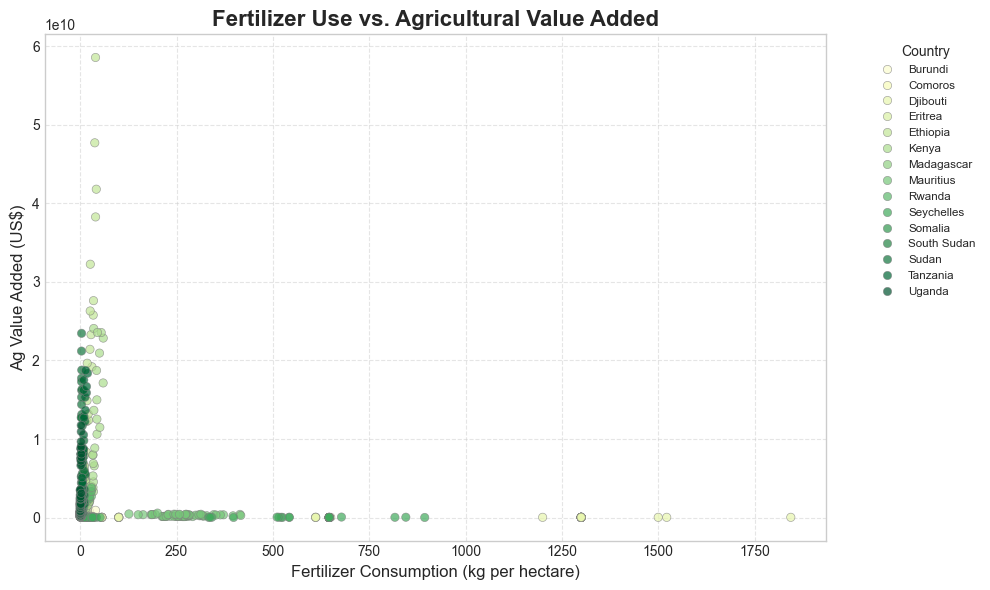

In [45]:
# Fertilizer Use vs. Agricultural Value Added (Productivity Proxy)
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_imputed,
    x="Fertilizer consumption (kilograms per hectare of arable land)",
    y="Agriculture, forestry, and fishing, value added (current US$)",
    hue="country_name",
    palette="YlGn",
    alpha=0.7,
    edgecolor='gray'
)

plt.title("Fertilizer Use vs. Agricultural Value Added", fontsize=16, weight='bold')
plt.xlabel("Fertilizer Consumption (kg per hectare)", fontsize=12)
plt.ylabel("Ag Value Added (US$)", fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small', title="Country")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


* Countries like Ethiopia stand out with very high agricultural value added despite relatively low fertilizer consumption suggesting that large-scale agriculture or other factors  may be driving economic output more than input intensity.
* Most countries cluster on the left side of the x-axis where Fertilizer usage is generally low , hinting at resource limitations or reliance on less input-intensive methods.

* Countries like Djibouti and Mauritius show extremely high fertilizer consumption  but low agricultural value added which may indicate inefficiencies, small agricultural sectors, or data anomalies.

* There's no clear linear correlation between fertilizer consumption and agricultural value added in this regional context.


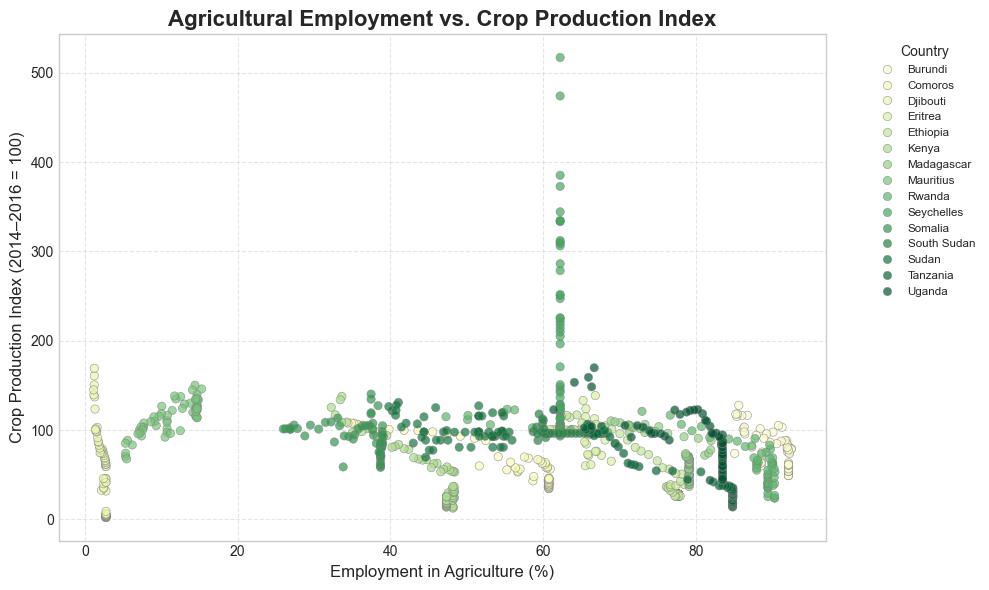

In [46]:
# Agricultural Employment vs. Productivity Index
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_imputed,
    x="Employment in agriculture (% of total employment) (modeled ILO estimate)",
    y="Crop production index (2014-2016 = 100)",
    hue="country_name",
    palette="YlGn",
    alpha=0.7,
    edgecolor="gray"
)

plt.title("Agricultural Employment vs. Crop Production Index", fontsize=16, weight='bold')
plt.xlabel("Employment in Agriculture (%)", fontsize=12)
plt.ylabel("Crop Production Index (2014–2016 = 100)", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small', title="Country")
plt.tight_layout()
plt.show()


- **Weak Positive Relationship at Low Employment Levels:** Countries with lower agricultural employment percentages (below 20%) tend to exhibit a slightly higher and more variable crop production index, suggesting that a smaller, likely more specialized agricultural workforce can achieve higher productivity through efficiency, mechanization, or technology adoption.

- **Plateau and Decline at Higher Employment Levels:** As the proportion of the workforce employed in agriculture increases beyond 40–50%, the crop production index generally stabilizes or declines, implying that economies heavily reliant on manual agricultural labor tend to have stagnant or lower productivity levels, possibly due to subsistence farming practices and limited modernization.

- **Presence of Outliers:** A few notable outliers achieve exceptionally high crop production indices despite moderate agricultural employment rates (~60%), indicating isolated cases of significant agricultural output improvements, likely driven by targeted policy interventions, favorable environmental conditions, or major investments in agricultural technologies.

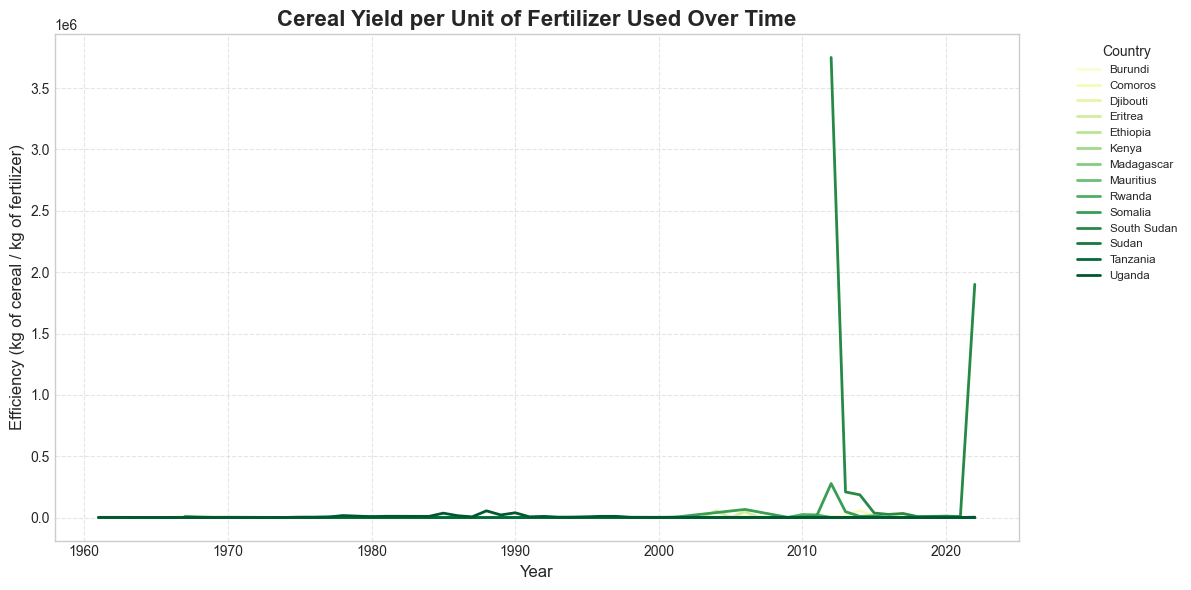

In [47]:
# Fertilizer Efficiency - Yield per Unit Fertilizer
# Create the efficiency metric
df_eff = df_pivot.copy()
df_eff['Yield_per_Fertilizer'] = df_eff['Cereal yield (kg per hectare)'] / df_eff['Fertilizer consumption (kilograms per hectare of arable land)']
df_eff = df_eff.replace([np.inf, -np.inf], np.nan).dropna(subset=['Yield_per_Fertilizer'])

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=df_eff,
    x='year',
    y='Yield_per_Fertilizer',
    hue='country_name',
    palette='YlGn',
    linewidth=2
)

plt.title('Cereal Yield per Unit of Fertilizer Used Over Time', fontsize=16, weight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Efficiency (kg of cereal / kg of fertilizer)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
plt.tight_layout()
plt.show()

- Countries with high and rising efficiency are likely adopting better farming practices or using more suitable inputs.
- Other countries  show poor returns which could be due to overuse, climatic mismatch, or improper application.

* Countries with stagnant fertilizer use may benefit from targeted subsidy or supply chain reforms.
* Identify outliers and assess whether agronomic practices or fertilizer quality need attention.
* Fertilizer is a leverage point for improving agricultural value and macroeconomic outcomes.
* Some high-fertilizer-use countries may have small populations and economies, skewing the expected correlation.
* High-ROI regions can serve as best practice benchmarks. Underperforming ones may need agronomic training or soil diagnostics.

### 3. Multivariate Analysis

In [48]:
#dropping irrelevant cols for multivariate analysis
cols = [
    "Fertilizer consumption (kilograms per hectare of arable land)",
    "Arable land (hectares per person)",
    "Average precipitation in depth (mm per year)",
    "Crop production index (2014-2016 = 100)",
    "Employment in agriculture (% of total employment) (modeled ILO estimate)",
    "Cereal yield (kg per hectare)"
]
df_mv = df[cols].dropna()

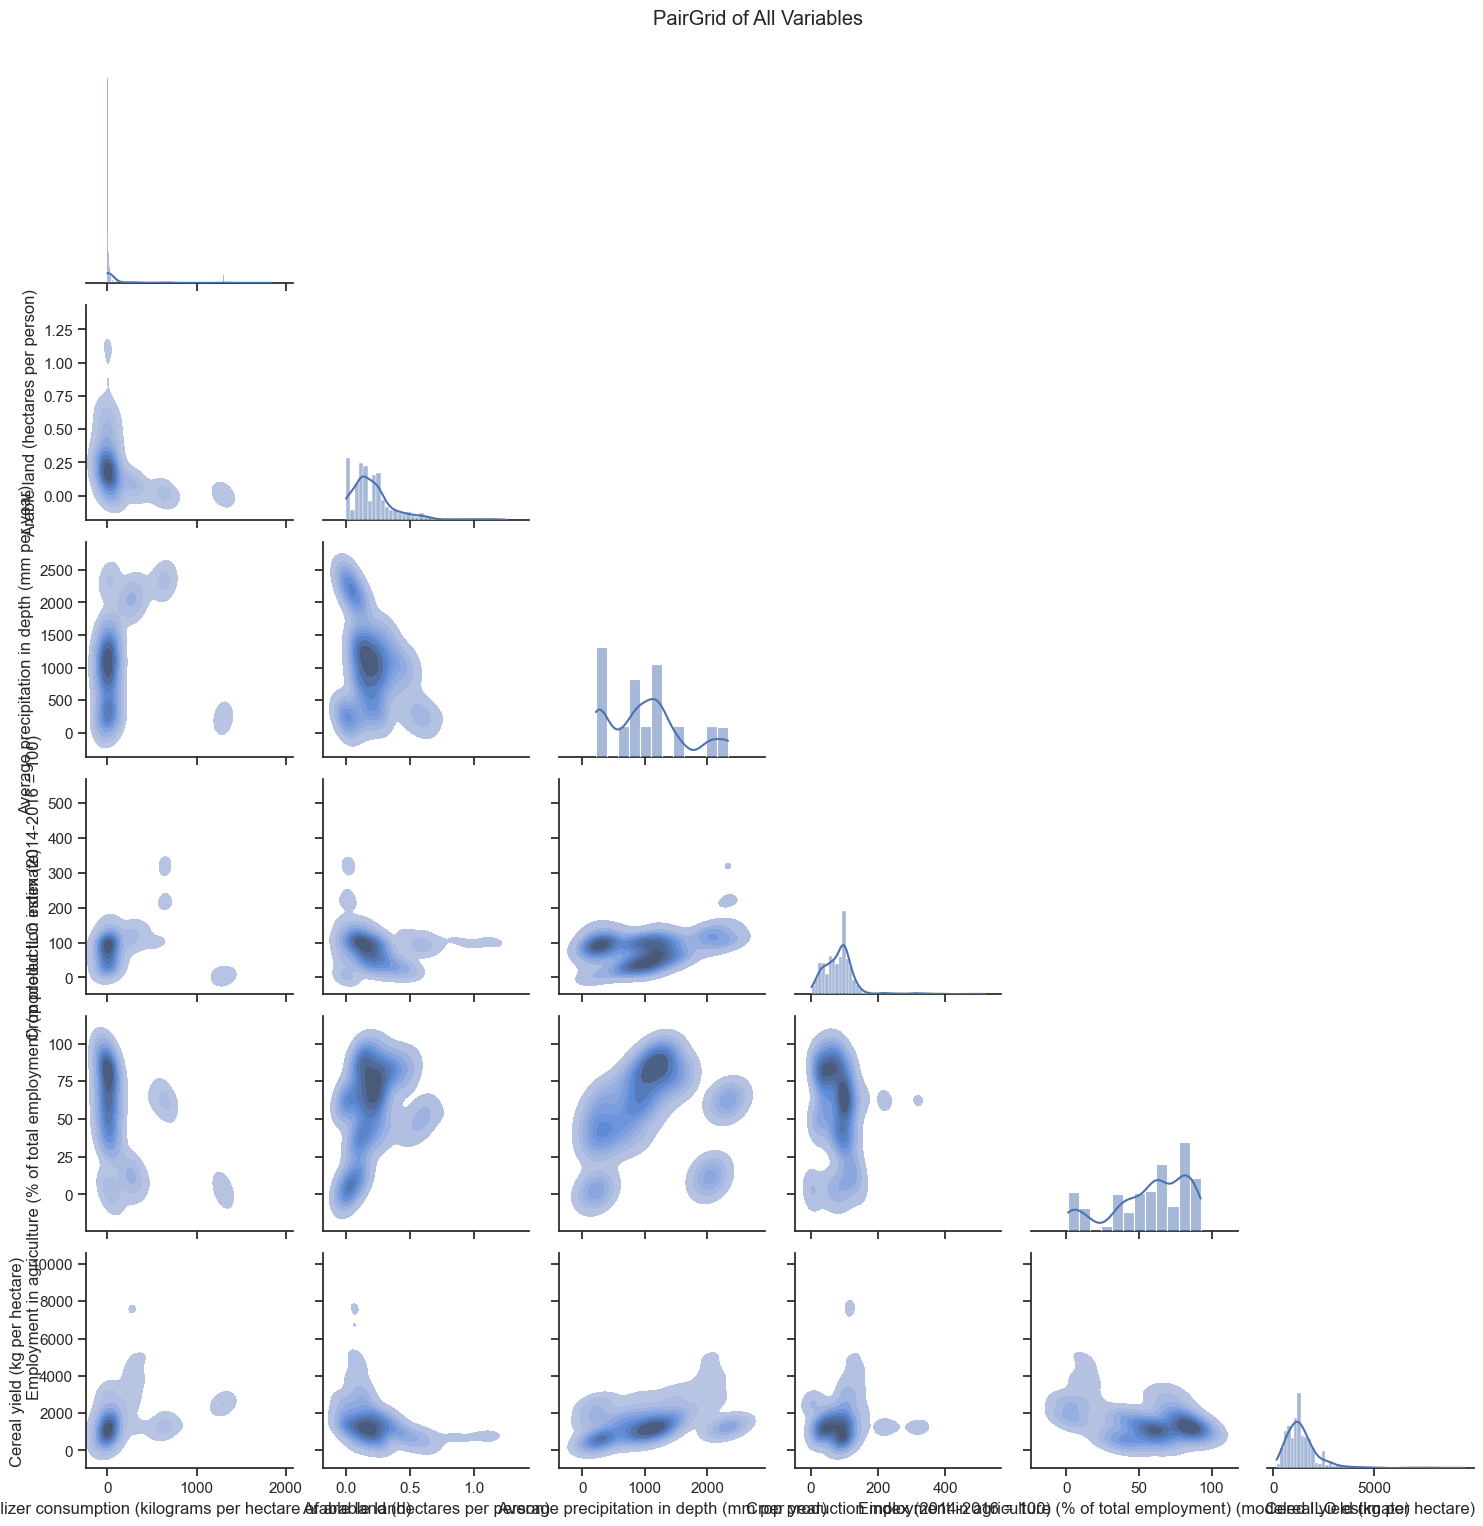

In [49]:
# PairGrid of All Variables
# PairGrid with country‐hue (multivariate view)
sns.set(style="ticks")
g = sns.PairGrid(df_mv, corner=True)
g.map_upper(sns.scatterplot, s=20, alpha=0.6)
g.map_lower(sns.kdeplot, fill=True)
g.map_diag(sns.histplot, kde=True)
plt.suptitle("PairGrid of All Variables", y=1.02)
plt.show()

Key Observations
Here are a few noticeable patterns:

🔹 Fertilizer consumption vs. Cereal yield
There's a positive correlation (bottom-left cell of the plot), indicating that higher fertilizer usage often aligns with higher cereal yields — makes sense agriculturally.

🔹 Employment in agriculture vs. Fertilizer consumption
There's a slightly inverse relationship, suggesting that countries with high agricultural employment might use less fertilizer per hectare (possibly due to traditional or subsistence farming methods).

🔹 Arable land per person vs. Agricultural land (%)
This appears to show some relationship, likely because arable land per person is partly derived from the total agricultural land.

🔹 Cereal yield vs. Arable land per person
The relationship is not very strong — suggests that productivity (yield) does not strictly depend on how much land is available per person, but rather on how it’s managed (fertilizer, irrigation, technology, etc.).

🔹 Average precipitation vs. Arable land per person
No clear correlation; likely because precipitation patterns are regionally variable and don't necessarily predict land availability

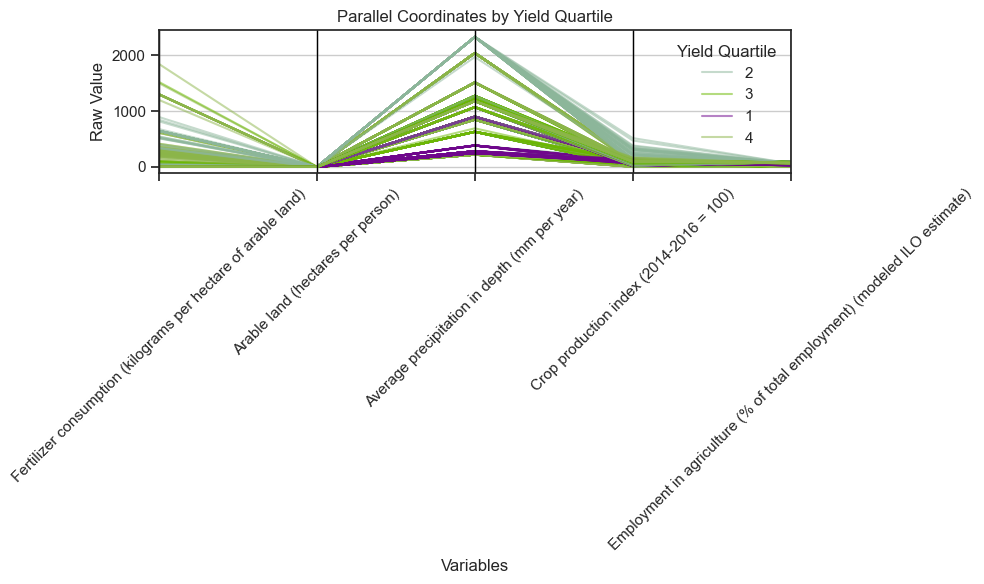

In [50]:
# Parallel coordinates by quartile of yield
# (groups observations by high/low yield to see multivariate patterns)
# Map quartile labels to numeric values
df_mv["YieldQuartile"] = pd.qcut(df_mv["Cereal yield (kg per hectare)"], 4, labels=["Q1","Q2","Q3","Q4"])
df_mv["YieldQuartile"] = df_mv["YieldQuartile"].map({"Q1": 1, "Q2": 2, "Q3": 3, "Q4": 4})

plt.figure(figsize=(10,6))
parallel_coordinates(df_mv, class_column="YieldQuartile", cols=cols[:-1], alpha=0.5)
plt.title("Parallel Coordinates by Yield Quartile")
plt.xlabel("Variables")
plt.ylabel("Raw Value")
plt.legend(title="Yield Quartile")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Summary Interpretation
High-yielding countries (Q4):

🔹Use more fertilizer

🔹Have a higher crop production index

🔹Tend to have less labor in agriculture (likely due to mechanization/industrialization)

🔹May get moderate to high rainfall

Low-yielding countries (Q1):

🔹Use less fertilizer

🔹Have a lower crop index

🔹Depend heavily on labor in agriculture

🔹Land per person and rainfall show no strong advantage

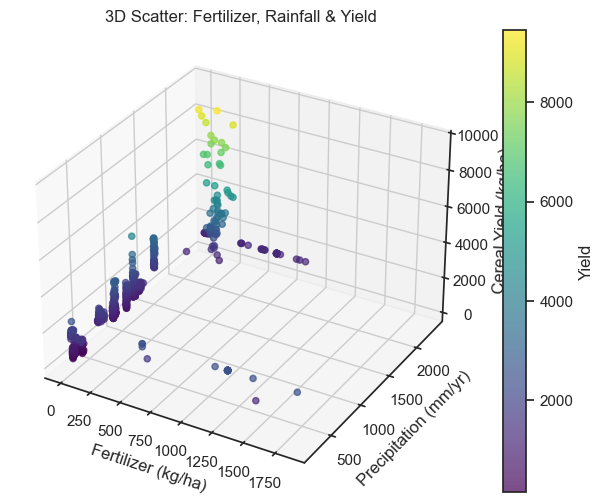

In [51]:
# 3D scatter of three key predictors vs. yield
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
x = df_mv["Fertilizer consumption (kilograms per hectare of arable land)"]
y = df_mv["Average precipitation in depth (mm per year)"]
z = df_mv["Cereal yield (kg per hectare)"]
p = ax.scatter(x, y, z, c=z, cmap="viridis", alpha=0.7)
ax.set_xlabel("Fertilizer (kg/ha)")
ax.set_ylabel("Precipitation (mm/yr)")
ax.set_zlabel("Cereal Yield (kg/ha)")
fig.colorbar(p, ax=ax, label="Yield")
plt.title("3D Scatter: Fertilizer, Rainfall & Yield")
plt.show()

Key observations from the graph:

🔹Fertilizer and Yield:
Generally, there is a positive correlation between fertilizer use and cereal yield, up to a point. The highest yields (yellow points) are observed when fertilizer application is between approximately 750 kg/ha and 1250 kg/ha. Beyond this range, the yield does not significantly increase and may even decrease.

🔹Rainfall and Yield:
The impact of rainfall on yield is less clear but seems to show that moderate rainfall levels (around 1000 mm/yr to 1500 mm/yr) are associated with higher yields, especially when combined with adequate fertilizer use. Very low or very high rainfall appears to limit yield, regardless of fertilizer application.
Interaction:
The highest yields are achieved when both fertilizer and rainfall are at optimal levels. The cluster of yellow points indicates that a balance between these two factors is crucial for maximizing cereal production.

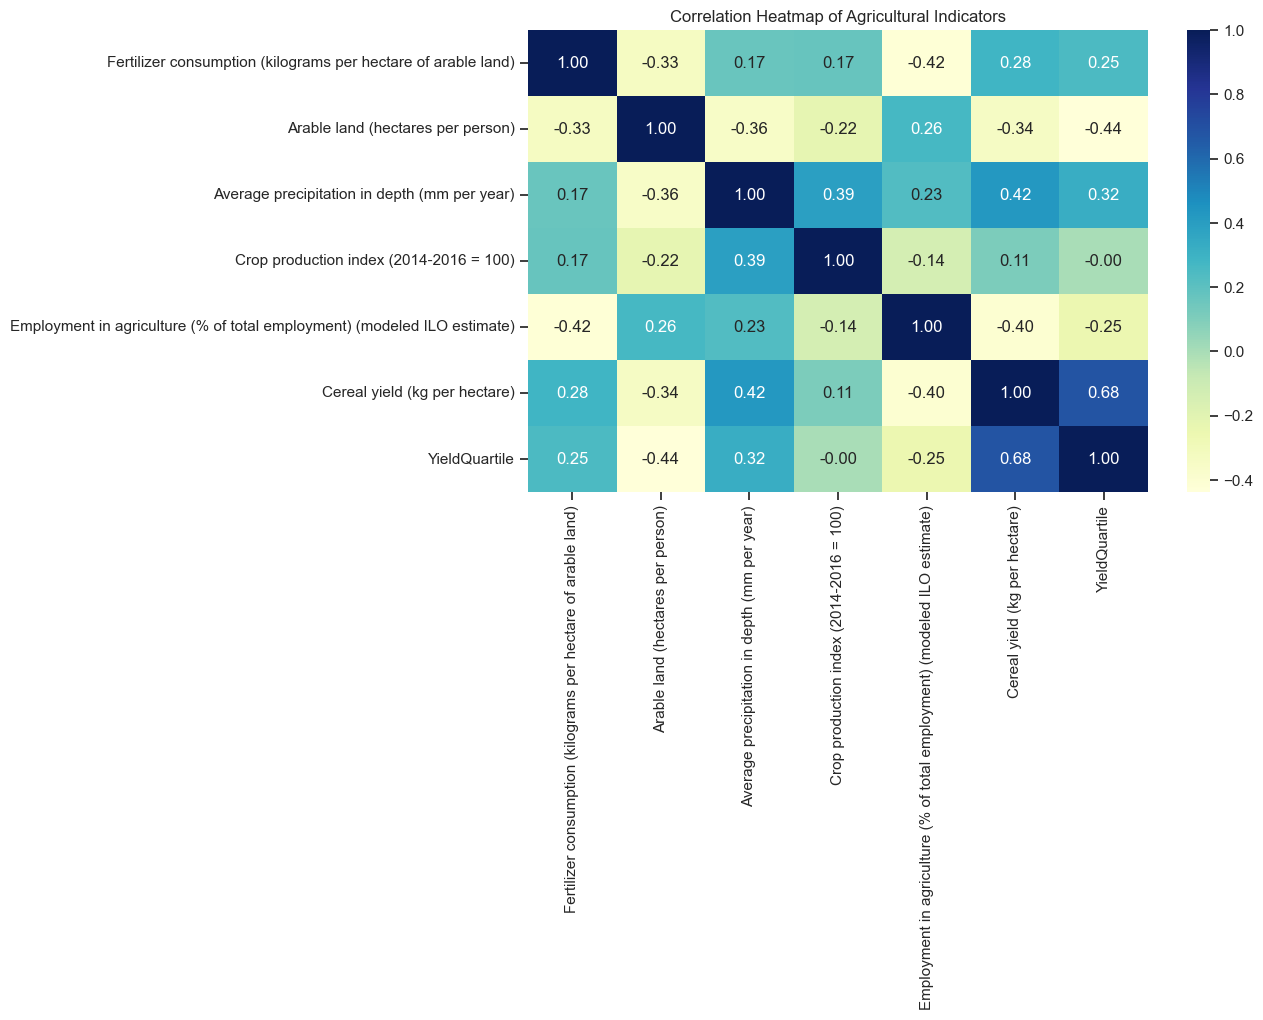

In [52]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_mv.corr(), annot=True, cmap='YlGnBu', fmt=".2f")
plt.title('Correlation Heatmap of Agricultural Indicators')
plt.show()





### PCA


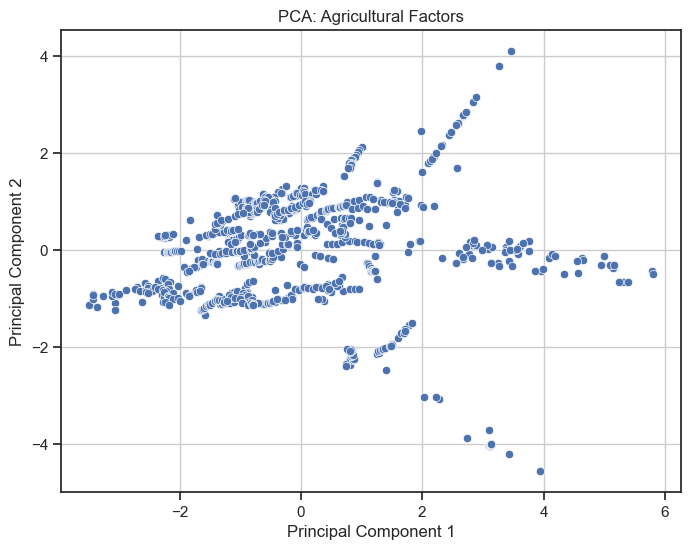

In [53]:
# Standardize
X_scaled = StandardScaler().fit_transform(df_mv)

# Apply PCA
pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled)

# Plot
plt.figure(figsize=(8,6))
sns.scatterplot(x=components[:,0], y=components[:,1])
plt.title('PCA: Agricultural Factors')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

- Each dot in the scatter plot represents one data point (likely one country-year observation), projected onto the first two principal components.
- **clustering**:
- If points group together, those observations are similar across the original variables (like fertilizer use, rural population, GDP, etc.).
- For instance, countries with similar agricultural productivity and fertilizer usage would appear close together.
- **Spread Along PC1 and PC2**:
- The more spread out the points, the more variation exists in those dimensions.
- If most points lie along PC1 (horizontal axis), then PC1 captures most of the information in the data

#### - Applying K-Means on PCA outputs

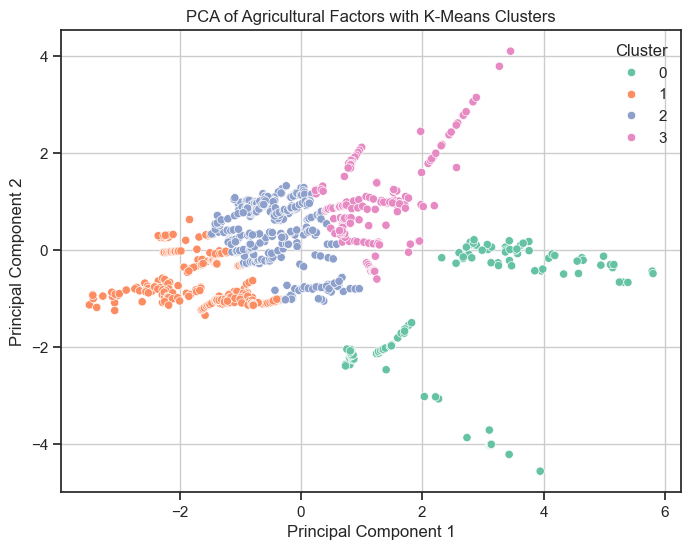

In [54]:
# Choose number of clusters (you can try 3–6 and compare)
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(components)

# Plot clusters
plt.figure(figsize=(8,6))
sns.scatterplot(x=components[:,0], y=components[:,1], hue=clusters, palette='Set2', legend='full')
plt.title('PCA of Agricultural Factors with K-Means Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.legend(title="Cluster")
plt.show()


## Modeling

### Time series forecasting for Kenya's fertilizer consumption

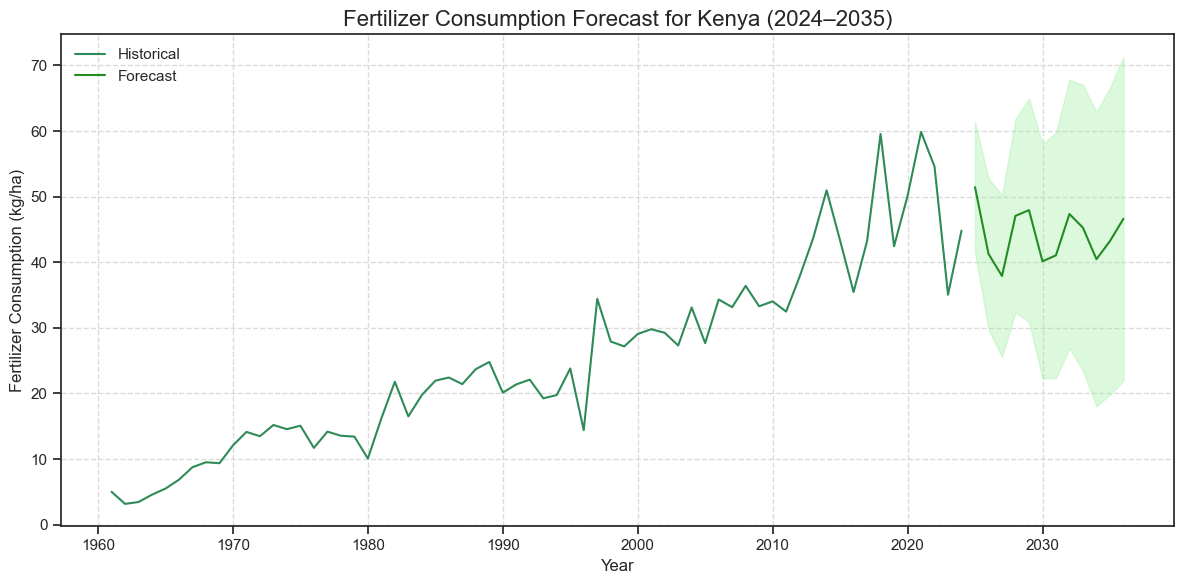

In [55]:
# Filter and prepare the data
country_df = df[df['country_name'] == 'Kenya'][['year', 'Fertilizer consumption (kilograms per hectare of arable land)']]
country_df.columns = ['year', 'fertilizer_consumption']
country_df['year'] = pd.to_datetime(country_df['year'], format='%Y')
country_df = country_df.set_index('year').resample('Y').mean()  # Ensure yearly frequency

# Fit manual ARIMA model (ARIMA(2,1,2))
model = ARIMA(country_df['fertilizer_consumption'], order=(2, 1, 2))
model_fit = model.fit()

# Forecast future values
forecast_periods = 12
forecast_result = model_fit.get_forecast(steps=forecast_periods)
forecast = forecast_result.predicted_mean
conf_int = forecast_result.conf_int()

# Generate future years index
forecast_years = pd.date_range(start=country_df.index[-1] + pd.DateOffset(years=1), periods=forecast_periods, freq='Y')

# Plot historical data and forecast
plt.figure(figsize=(12, 6))
plt.plot(country_df.index, country_df['fertilizer_consumption'], label='Historical', color='seagreen')
plt.plot(forecast_years, forecast, label='Forecast', color='forestgreen')
plt.fill_between(forecast_years, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='lightgreen', alpha=0.3)
plt.title('Fertilizer Consumption Forecast for Kenya (2024–2035)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Fertilizer Consumption (kg/ha)', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


The historical data for Kenya's fertilizer consumption from 1960 to 2023 shows a clear long-term upward trend, punctuated by periods of variability and sharp fluctuations, especially in the last two decades.  

The forecast suggests that fertilizer consumption is expected to stabilize over the next decade, fluctuating moderately around an average of 40–45 kg/ha. This is a notable change from the past, where consumption showed more rapid increases and volatility.  
However, the wide confidence intervals (shaded region) highlight considerable uncertainty in the forecast, suggesting that external factors such as policy interventions, international market prices, climate variability, or technological adoption could significantly influence actual outcomes.  

Proactive agricultural policies could help push consumption toward the higher end of the forecast range.

### Evaluating

In [56]:
# Train/test split
train = country_df.iloc[:-12]
test = country_df.iloc[-12:]

In [57]:
model = ARIMA(train['fertilizer_consumption'], order=(2,1,2))
model_fit = model.fit()

forecast_result = model_fit.get_forecast(steps=len(test))
forecast = forecast_result.predicted_mean

# Evaluation metrics
mae = mean_absolute_error(test, forecast)
rmse = np.sqrt(mean_squared_error(test, forecast))

print(f"ARIMA MAE: {mae:.2f}")
print(f"ARIMA RMSE: {rmse:.2f}")


ARIMA MAE: 11.46
ARIMA RMSE: 13.71


### Back-testing ARIMA

In [58]:
# Split data
train = country_df.iloc[:-7]  # Up to 2016
test = country_df.iloc[-7:]   # 2017-2023

# Fit ARIMA on training data
model = ARIMA(train['fertilizer_consumption'], order=(2,1,2))
model_fit = model.fit()

# Forecast next 7 steps (2017-2023)
forecast_result = model_fit.get_forecast(steps=len(test))
forecast = forecast_result.predicted_mean

# Evaluation
mae = mean_absolute_error(test['fertilizer_consumption'], forecast)
rmse = np.sqrt(mean_squared_error(test['fertilizer_consumption'], forecast))
mape = np.mean(np.abs((test['fertilizer_consumption'] - forecast) / test['fertilizer_consumption'])) * 100

print(f'ARIMA MAE: {mae:.2f}')
print(f'ARIMA RMSE: {rmse:.2f}')
print(f'ARIMA MAPE: {mape:.2f}%')


ARIMA MAE: 8.68
ARIMA RMSE: 10.04
ARIMA MAPE: 18.43%


### LSTM

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 693ms/step - loss: 0.1280 - val_loss: 0.5512
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - loss: 0.1122 - val_loss: 0.4926
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - loss: 0.0926 - val_loss: 0.4383
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - loss: 0.0820 - val_loss: 0.3824
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step - loss: 0.0655 - val_loss: 0.3239
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step - loss: 0.0510 - val_loss: 0.2633
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - loss: 0.0365 - val_loss: 0.2021
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - loss: 0.0235 - val_loss: 0.1429
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - loss: 0.0149 - val_loss: 0.0905
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - loss: 0.0078 - val_loss: 0.0521
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step - loss: 0.0096 - val_loss: 0.0323
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - loss: 0.01

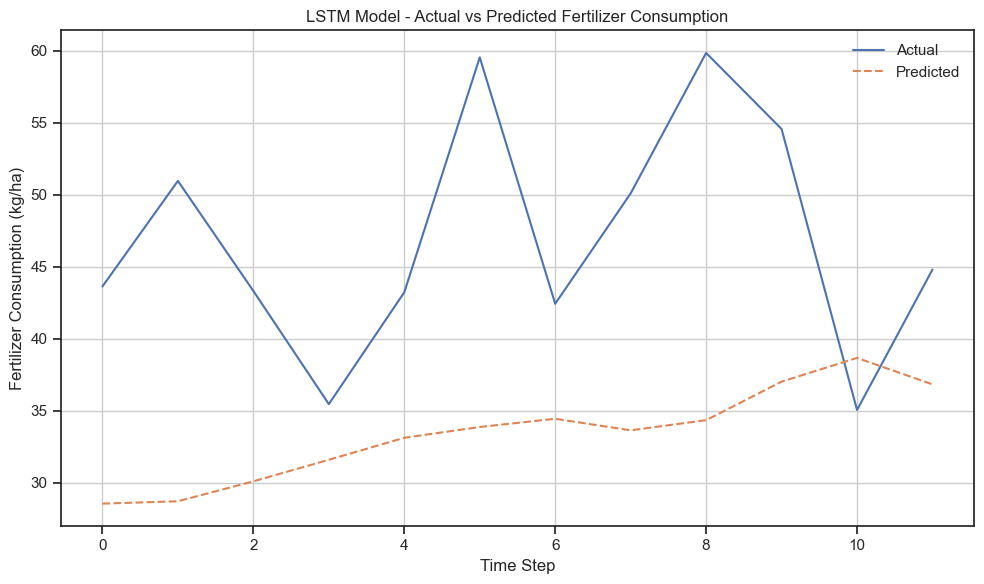

In [59]:
# Load and prepare the data
country_df = df[df['country_name'] == 'Kenya'][['year', 'Fertilizer consumption (kilograms per hectare of arable land)']]
country_df.columns = ['year', 'fertilizer_consumption']
country_df['year'] = pd.to_datetime(country_df['year'])
country_df = country_df.set_index('year')

# Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(country_df)

# Create sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 5
X, y = create_sequences(scaled_data, seq_length)

# Split into training and testing
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Build the LSTM model
model = Sequential()
model.add(LSTM(64, return_sequences=True, input_shape=(seq_length, 1)))
model.add(LSTM(32))
model.add(Dense(16, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')


# Fit the model
early_stop = EarlyStopping(monitor='val_loss', patience=10)
model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), callbacks=[early_stop], verbose=1)

# Make predictions
y_pred = model.predict(X_test)
y_pred_rescaled = scaler.inverse_transform(y_pred)
y_test_rescaled = scaler.inverse_transform(y_test)

# Evaluation
rmse = np.sqrt(mean_squared_error(y_test_rescaled, y_pred_rescaled))
print(f"LSTM RMSE: {rmse:.2f}")

# Plot predictions vs actual
plt.figure(figsize=(10,6))
plt.plot(y_test_rescaled, label='Actual')
plt.plot(y_pred_rescaled, label='Predicted', linestyle='--')
plt.title('LSTM Model - Actual vs Predicted Fertilizer Consumption')
plt.xlabel('Time Step')
plt.ylabel('Fertilizer Consumption (kg/ha)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Observation:  
Loss decreased initially but plateaued.  
We can try to improve the model by reducing the complexity.

## Trying to reduce model complexity of the neural network  
Here we remove a layer, to see if the simpler model may generalize better coompared to the previous one.

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 449ms/step - loss: 0.0896 - val_loss: 0.3953
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - loss: 0.0760 - val_loss: 0.3482
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - loss: 0.0663 - val_loss: 0.3033
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - loss: 0.0531 - val_loss: 0.2609
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - loss: 0.0417 - val_loss: 0.2209
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - loss: 0.0340 - val_loss: 0.1834
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - loss: 0.0263 - val_loss: 0.1489
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - loss: 0.0183 - val_loss: 0.1180
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - loss: 0.0118 - val_loss: 0.0911
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - loss: 0.0087 - val_loss: 0.0689
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step - loss: 0.0073 - val_loss: 0.0519
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - loss: 0.0063 - v

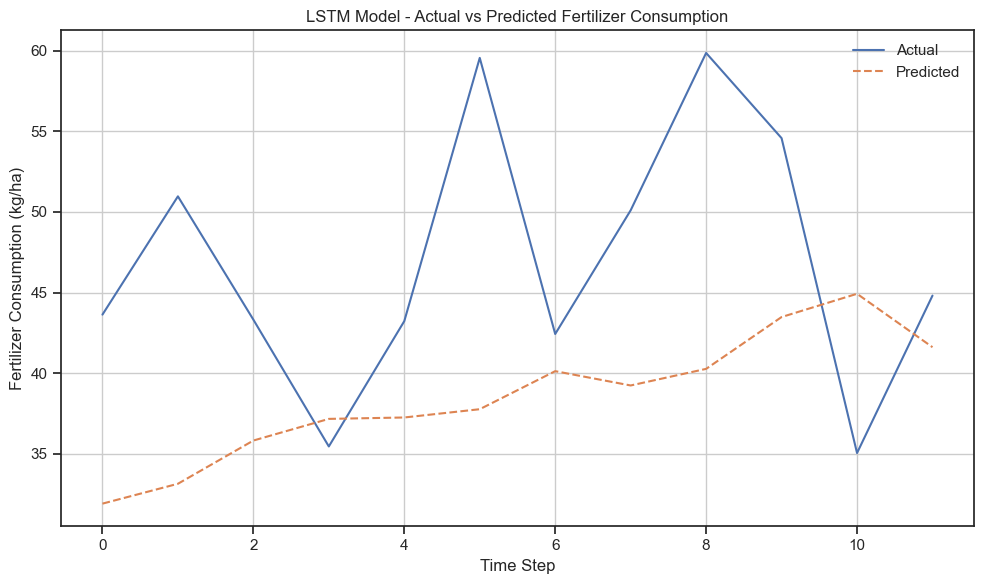

In [60]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(32, input_shape=(seq_length, 1)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')


# Fit the model
early_stop = EarlyStopping(monitor='val_loss', patience=10)
model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), callbacks=[early_stop], verbose=1)

# Make predictions
y_pred = model.predict(X_test)
y_pred_rescaled = scaler.inverse_transform(y_pred)
y_test_rescaled = scaler.inverse_transform(y_test)

# Evaluation
rmse = np.sqrt(mean_squared_error(y_test_rescaled, y_pred_rescaled))
print(f"LSTM RMSE: {rmse:.2f}")

# Plot predictions vs actual
plt.figure(figsize=(10,6))
plt.plot(y_test_rescaled, label='Actual')
plt.plot(y_pred_rescaled, label='Predicted', linestyle='--')
plt.title('LSTM Model - Actual vs Predicted Fertilizer Consumption')
plt.xlabel('Time Step')
plt.ylabel('Fertilizer Consumption (kg/ha)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Observation:  
Still the LSTM model isn't performing well.  


### Trying N-BEATS (Neural Basis Expansion Analysis Time Series)

In [61]:
# Prepare data
country_df = df[df['country_name'] == 'Kenya'][['year', 'Fertilizer consumption (kilograms per hectare of arable land)']]
country_df.columns = ['ds', 'y']
country_df['ds'] = pd.to_datetime(country_df['ds'], format='%Y')
country_df['unique_id'] = 'Kenya'

print(country_df.head())


            ds         y unique_id
285 1960-01-01  5.017714     Kenya
286 1961-01-01  3.171429     Kenya
287 1962-01-01  3.457143     Kenya
288 1963-01-01  4.577714     Kenya
289 1964-01-01  5.504286     Kenya


Fitting the N-BEATS

In [62]:
# Prepare data
country_df = df[df['country_name'] == 'Kenya'][['year', 'Fertilizer consumption (kilograms per hectare of arable land)']]
country_df.columns = ['ds', 'y']
country_df['ds'] = pd.to_datetime(country_df['ds'], format='%Y')
country_df['unique_id'] = 'Kenya'

# Define model
horizon = 7  # number of years to forecast for evaluation
model = NBEATS(h=horizon, input_size=5, max_steps=1000)

# Initialize NeuralForecast
nf = NeuralForecast(models=[model], freq='Y')

# Fit model
nf.fit(country_df)
# saving the model
nf.save("models/nbeats_kenya")

# Cross-validation (backtest)
cv_df = nf.cross_validation(df=country_df, n_windows=1, step_size=1)

# Merge actuals (use LEFT join to retain y values from original)
merged = pd.merge(cv_df, country_df[['unique_id', 'ds', 'y']], on=['unique_id', 'ds'], how='left')

# Check columns
if 'y' not in merged.columns:
    print('Warning: y column missing after merge! Columns:', merged.columns)
    # fallback: check for suffixes
    if 'y_x' in merged.columns and 'y_y' in merged.columns:
        print('Found y_x and y_y columns, using y_x for actual values.')
        actual = merged['y_x']
    else:
        raise KeyError("No 'y' or 'y_x' column found after merge!")
else:
    actual = merged['y']

# Predicted values
predicted = merged['NBEATS']

# Compute metrics
mae = mean_absolute_error(actual, predicted)
rmse = np.sqrt(mean_squared_error(actual, predicted))
mape = np.mean(np.abs((actual - predicted) / actual)) * 100

print(f'NBEATS MAE: {mae:.2f}')
print(f'NBEATS RMSE: {rmse:.2f}')
print(f'NBEATS MAPE: {mape:.2f}%')


Seed set to 1
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name         | Type          | Params | Mode 
-------------------------------------------------------
0 | loss         | MAE           | 0      | train
1 | padder_train | ConstantPad1d | 0      | train
2 | scaler       | TemporalNorm  | 0      | train
3 | blocks       | ModuleList    | 2.4 M  | train
-------------------------------------------------------
2.4 M     Trainable params
180       Non-trainable params
2.4 M     Total params
9.579     Total estimated model params size (MB)
31        Modules in train mode
0         Modules in eval mode


Epoch 99: 100%|██████████████████| 1/1 [00:00<00:00,  5.65it/s, v_num=5, train_loss_step=2.400, train_loss_epoch=2.440]
Validation: |                                                                                    | 0/? [00:00<?, ?it/s]
Epoch 199: 100%|█████████████████| 1/1 [00:00<00:00,  5.94it/s, v_num=5, train_loss_step=1.110, train_loss_epoch=1.080]
Validation: |                                                                                    | 0/? [00:00<?, ?it/s]
Epoch 299: 100%|█████████████████| 1/1 [00:00<00:00,  5.57it/s, v_num=5, train_loss_step=0.626, train_loss_epoch=0.648]
Validation: |                                                                                    | 0/? [00:00<?, ?it/s]
Epoch 399: 100%|█████████████████| 1/1 [00:00<00:00,  4.44it/s, v_num=5, train_loss_step=0.247, train_loss_epoch=0.242]
Validation: |                                                                                    | 0/? [00:00<?, ?it/s]
Epoch 499: 100%|█████████████████| 1/1 [

`Trainer.fit` stopped: `max_steps=1000` reached.


Epoch 999: 100%|█████████████████| 1/1 [00:00<00:00,  3.41it/s, v_num=5, train_loss_step=0.078, train_loss_epoch=0.078]


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name         | Type          | Params | Mode 
-------------------------------------------------------
0 | loss         | MAE           | 0      | train
1 | padder_train | ConstantPad1d | 0      | train
2 | scaler       | TemporalNorm  | 0      | train
3 | blocks       | ModuleList    | 2.4 M  | train
-------------------------------------------------------
2.4 M     Trainable params
180       Non-trainable params
2.4 M     Total params
9.579     Total estimated model params size (MB)
31        Modules in train mode
0         Modules in eval mode


Epoch 99: 100%|██████████████████| 1/1 [00:00<00:00,  5.95it/s, v_num=6, train_loss_step=0.363, train_loss_epoch=0.298]
Validation: |                                                                                    | 0/? [00:00<?, ?it/s]
Epoch 199: 100%|█████████████████| 1/1 [00:00<00:00,  5.89it/s, v_num=6, train_loss_step=0.190, train_loss_epoch=0.167]
Validation: |                                                                                    | 0/? [00:00<?, ?it/s]
Epoch 299: 100%|█████████████████| 1/1 [00:00<00:00,  6.09it/s, v_num=6, train_loss_step=0.143, train_loss_epoch=0.136]
Validation: |                                                                                    | 0/? [00:00<?, ?it/s]
Epoch 399: 100%|███████████████| 1/1 [00:00<00:00,  5.05it/s, v_num=6, train_loss_step=0.0633, train_loss_epoch=0.0686]
Validation: |                                                                                    | 0/? [00:00<?, ?it/s]
Epoch 499: 100%|███████████████| 1/1 [00

`Trainer.fit` stopped: `max_steps=1000` reached.


Epoch 999: 100%|███████████████| 1/1 [00:00<00:00,  2.87it/s, v_num=6, train_loss_step=0.0372, train_loss_epoch=0.0372]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs



Predicting DataLoader 0: 100%|███████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 56.98it/s]
Found y_x and y_y columns, using y_x for actual values.
NBEATS MAE: 6.65
NBEATS RMSE: 8.03
NBEATS MAPE: 15.20%


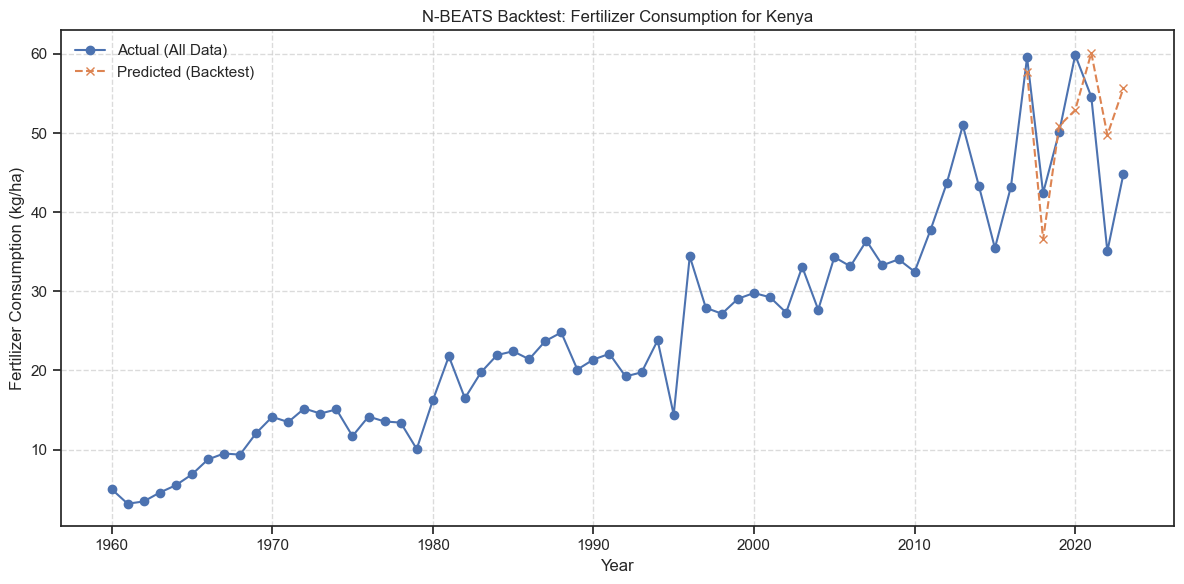

In [63]:
# Plot actual vs predicted
plt.figure(figsize=(12, 6))
plt.plot(country_df['ds'], country_df['y'], label='Actual (All Data)', marker='o')
plt.plot(merged['ds'], merged['NBEATS'], label='Predicted (Backtest)', marker='x', linestyle='--')
plt.title('N-BEATS Backtest: Fertilizer Consumption for Kenya')
plt.xlabel('Year')
plt.ylabel('Fertilizer Consumption (kg/ha)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Observation:  
The N-BEATS model performs best among the models, with an RMSE of 8.72

### Forecasting consumption upto 2035

Seed set to 1
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name         | Type          | Params | Mode 
-------------------------------------------------------
0 | loss         | MAE           | 0      | train
1 | padder_train | ConstantPad1d | 0      | train
2 | scaler       | TemporalNorm  | 0      | train
3 | blocks       | ModuleList    | 2.4 M  | train
-------------------------------------------------------
2.4 M     Trainable params
425       Non-trainable params
2.4 M     Total params
9.632     Total estimated model params size (MB)
31        Modules in train mode
0         Modules in eval mode


Forecasting 12 years ahead (from 2024 to 2035).
Epoch 99: 100%|██████████████████| 1/1 [00:00<00:00,  5.22it/s, v_num=8, train_loss_step=2.260, train_loss_epoch=2.300]
Validation: |                                                                                    | 0/? [00:00<?, ?it/s]
Epoch 199: 100%|█████████████████| 1/1 [00:00<00:00,  5.52it/s, v_num=8, train_loss_step=0.943, train_loss_epoch=0.929]
Validation: |                                                                                    | 0/? [00:00<?, ?it/s]
Epoch 299: 100%|█████████████████| 1/1 [00:00<00:00,  3.77it/s, v_num=8, train_loss_step=0.441, train_loss_epoch=0.475]
Validation: |                                                                                    | 0/? [00:00<?, ?it/s]
Epoch 399: 100%|█████████████████| 1/1 [00:00<00:00,  5.64it/s, v_num=8, train_loss_step=0.219, train_loss_epoch=0.173]
Validation: |                                                                                    | 0/? [00:00<?,

`Trainer.fit` stopped: `max_steps=1000` reached.


Epoch 999: 100%|███████████████| 1/1 [00:00<00:00,  3.01it/s, v_num=8, train_loss_step=0.0563, train_loss_epoch=0.0563]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs



Predicting DataLoader 0: 100%|███████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 45.78it/s]


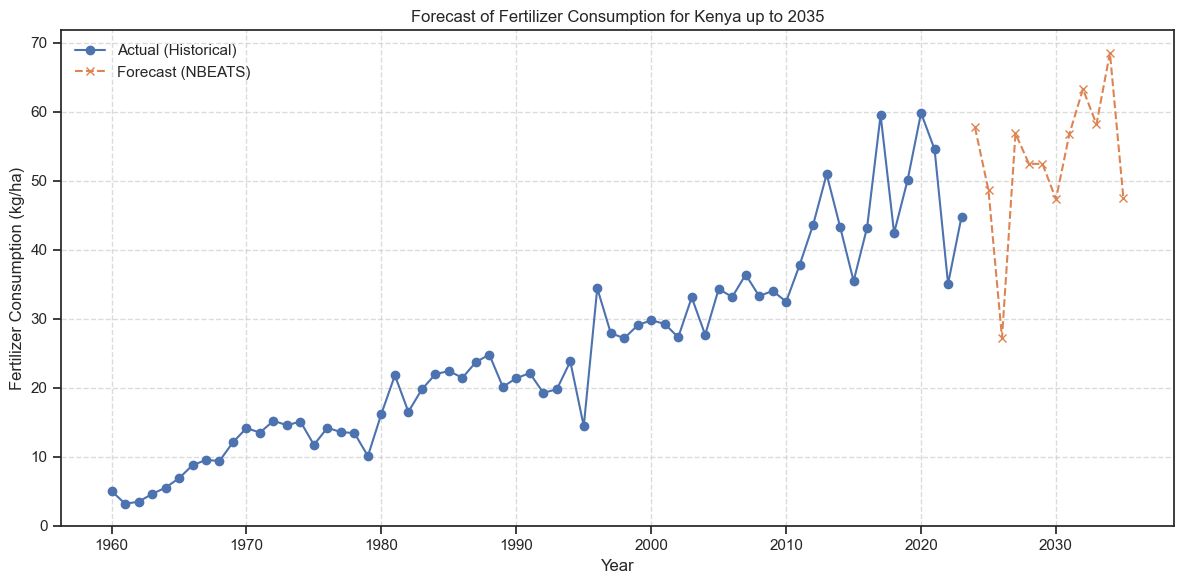

,unique_id,ds,NBEATS
0,Kenya,2023-12-31,57.753773
1,Kenya,2024-12-31,48.626259
2,Kenya,2025-12-31,27.274965
3,Kenya,2026-12-31,56.880650
4,Kenya,2027-12-31,52.471672
5,Kenya,2028-12-31,52.466091
6,Kenya,2029-12-31,47.343140
7,Kenya,2030-12-31,56.820580
8,Kenya,2031-12-31,63.325352
9,Kenya,2032-12-31,58.206856


In [64]:
# Check last year in data
last_year = country_df['ds'].dt.year.max()
forecast_horizon = 2035 - last_year

if forecast_horizon <= 0:
    raise ValueError(f"Forecast horizon is {forecast_horizon}. Check that last_year ({last_year}) < 2035.")

print(f"Forecasting {forecast_horizon} years ahead (from {last_year + 1} to 2035).")

# Define model with new horizon
model_forecast = NBEATS(h=forecast_horizon, input_size=5, max_steps=1000)

# Initialize NeuralForecast for forecasting
nf_forecast = NeuralForecast(models=[model_forecast], freq='Y')

# Fit model again (required for new horizon)
nf_forecast.fit(country_df)

# Predict future (no df needed → will forecast h steps forward)
forecast_df = nf_forecast.predict()

# Plot historical + forecast
plt.figure(figsize=(12, 6))

# Plot historical
plt.plot(country_df['ds'], country_df['y'], label='Actual (Historical)', marker='o')

# Plot forecast
plt.plot(forecast_df['ds'], forecast_df['NBEATS'], label='Forecast (NBEATS)', marker='x', linestyle='--')

plt.title('Forecast of Fertilizer Consumption for Kenya up to 2035')
plt.xlabel('Year')
plt.ylabel('Fertilizer Consumption (kg/ha)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# display forecast values
display(forecast_df)


Since the N-BEATS is the best performing model, it's the one we'll save and deploy.

In [76]:
country_df

,ds,y,unique_id
285,1960-01-01,5.017714,Kenya
286,1961-01-01,3.171429,Kenya
287,1962-01-01,3.457143,Kenya
288,1963-01-01,4.577714,Kenya
289,1964-01-01,5.504286,Kenya
...,...,...,...
344,2019-01-01,50.099510,Kenya
345,2020-01-01,59.852504,Kenya
346,2021-01-01,54.570373,Kenya
347,2022-01-01,35.055941,Kenya


In [75]:
country_df.to_csv("models/kenya_series.csv", index=False)

## Predicting crop production index using regression

In [65]:
# loading the dataset
df = pd.read_csv('clean/df_clean.csv')

### Feature and target selection

In [66]:
# x as our input features (independent variables)
# y as our target variable (dependent variable we want to predict)
target = "Crop production index (2014-2016 = 100)"
features = [
    "Fertilizer consumption (kilograms per hectare of arable land)",
    "Cereal yield (kg per hectare)",
    "Arable land (hectares per person)"
]

X = df[features]
y = df[target]

In [67]:
#Handling missing values
X = X.fillna(X.median())

In [68]:
# split train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

#### Train Linear Regression model

In [69]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

#Evaluate Linear Regression

print("Linear Regression Results:")
print("MSE:", mean_squared_error(y_test, y_pred_lr))
print("R-squared:", r2_score(y_test, y_pred_lr))

Linear Regression Results:
MSE: 1906.4134692697396
R-squared: 0.07503784783298384


#### Train random forest regressor

In [70]:
# Train Random forest regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)


print("Random Forest Regressor Results:")
print("MSE:", mean_squared_error(y_test, y_pred_rf))
print("R-squared:", r2_score(y_test, y_pred_rf))

Random Forest Regressor Results:
MSE: 257.65529539764026
R-squared: 0.8749896596987852


#### Train XGBRegressor

In [71]:
xgb = XGBRegressor(n_estimators=100, random_state=42)
xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)
#Evaluate XGBoost

print("XGBoost Regressor Results:")
print("MSE:", mean_squared_error(y_test, y_pred_xgb))
print("R-squared:", r2_score(y_test, y_pred_xgb))

XGBoost Regressor Results:
MSE: 270.2206969607568
R-squared: 0.8688931223735873


#### Comparing the model performance

In [72]:
# Comparing Model Performances
results = []

# Random Forest
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
results.append(('Random Forest', mse_rf, r2_rf))
print("Random Forest:")
print(f"  - Mean Squared Error (MSE): {mse_rf:.2f}")
print(f"  - R-squared: {r2_rf:.2f}\n")

# XGBoost
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
results.append(('XGBoost', mse_xgb, r2_xgb))
print("XGBoost:")
print(f"  - Mean Squared Error (MSE): {mse_xgb:.2f}")
print(f"  - R-squared: {r2_xgb:.2f}\n")

# Linear Regression
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
results.append(('Linear Regression', mse_lr, r2_lr))
print("Linear Regression:")
print(f"  - Mean Squared Error (MSE): {mse_lr:.2f}")
print(f"  - R-squared: {r2_lr:.2f}\n")

Random Forest:
  - Mean Squared Error (MSE): 257.66
  - R-squared: 0.87

XGBoost:
  - Mean Squared Error (MSE): 270.22
  - R-squared: 0.87

Linear Regression:
  - Mean Squared Error (MSE): 1906.41
  - R-squared: 0.08



## Summary
Random Forest and XGBoost perform very well, with Random Forest slightly better.

Linear Regression performs poorly, likely because the relationship between features and the target is non-linear.

## Recommendations
1.	**Expand Fertilizer Accessibility:** Establish regional supply chains and subsidy programs to make fertilizers more affordable and accessible to farmers.

2.	**Promote Sustainable Fertilizer Usage:** Train farmers on correct fertilizer application techniques to improve efficiency and reduce environmental degradation.

3.	**Enhance Cereal Crop Productivity:** Invest in research, better seed varieties, and irrigation infrastructure to boost cereal yields sustainably.

4.	**Optimize Use of Arable Land:**  Encourage land management practices such as crop rotation and soil conservation to maximize the productivity of available farmland.

5.	**Strengthen Farmer Education Programs:** Launch region-wide agricultural extension services that provide farmers with up-to-date knowledge on inputs, yields, and market access.

6.	**Leverage Technology and Innovation:** Promote adoption of precision farming tools, mobile-based advisory services, and AI-driven solutions to modernize agriculture.

7.	**Build Resilience Against Agricultural Risks:** Develop regional strategies including crop insurance schemes and emergency fertilizer reserves to protect against climate and market shocks.

8.	**Improve Agricultural Data Infrastructure:** Establish harmonized systems for real-time agricultural data collection, analysis, and sharing across East African countries.

9.	**Encourage Public-Private Partnerships (PPPs):** Foster collaboration between governments, private companies, and NGOs to drive innovation, funding, and scaling of agricultural solutions.

## Conclusion

This project highlights critical insights into fertilizer consumption patterns, land use, and crop production trends across East Africa. Our analysis reveals that while fertilizer use is gradually increasing, there is significant room for improvement in optimizing agricultural inputs and maximizing crop yields. Forecasting suggests a moderate rise in fertilizer consumption, but variability remains a concern due to external economic and environmental factors. Furthermore, advanced modeling shows that non-linear relationships between fertilizer use, cereal yield, and land availability strongly influence agricultural productivity, emphasizing the need for integrated solutions. Moving forward, a regional focus on accessibility, sustainability, innovation, and data-driven decision-making will be essential to unlock East Africa’s full agricultural potential and ensure food security for the future.


### Saving the trained randomforest regressor model

In [73]:
# Save the model and scaler
joblib.dump(rf, "models/random_forest_model.pkl")
joblib.dump(scaler, "models/scaler.pkl")

['models/scaler.pkl']